In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
    RidgeCV,
    ElasticNetCV,
    LassoCV,
    SGDRegressor
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
### Carga datos de dataset
### Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
### tras observar los datos del día de hoy, el objetivo es predecir las variables target:
###                                                                                     -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
###                                                                                     -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path = "weatherAUS.csv"
df = pd.read_csv(file_path, sep=",", engine="python")

In [3]:
df

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145407,145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0.0
145408,145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0.0
145409,145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0.0
145410,145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0.0


Elimino la columna 'Unnamed: 0' porque es un indice que esta de mas.


In [4]:
df = df.drop("Unnamed: 0", axis=1)

Segun el enunciado, unicamente nos interesan las ciudades Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport por lo que filtro el DataSet para quedarme unicamente con los datos de dichas ciudades.

Tambien elimino de una vez la variable 'Location' debido a que el enunicado declara que se pueden considerar como una unica ubicacion.


In [5]:
ciudades = [
    " Adelaide",
    "Canberra",
    "Cobar",
    "Dartmoor",
    "Melbourne",
    "MelbourneAirport",
    "MountGambier",
    "Sydney",
    "SydneyAirport",
]
df = df[df["Location"].isin(ciudades)]
df = df.drop("Location", axis=1)

In [6]:
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
6047,2009-01-01,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0
6048,2009-01-02,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0
6049,2009-01-03,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,N,...,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,No,No,0.0
6050,2009-01-04,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0
6051,2009-01-05,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,2017-06-20,6.2,16.3,0.0,NaN,NaN,N,41.0,N,NW,...,70.0,1026.3,1024.1,NaN,NaN,8.7,15.5,No,Yes,2.0
102516,2017-06-21,8.7,13.2,2.0,NaN,NaN,S,20.0,NaN,SE,...,82.0,1029.2,1028.3,NaN,8.0,11.1,12.0,Yes,No,0.0
102517,2017-06-22,7.0,15.7,0.0,NaN,NaN,N,31.0,N,NNW,...,67.0,1027.0,1022.4,8.0,NaN,10.0,14.9,No,No,0.0
102518,2017-06-23,5.4,16.2,0.0,NaN,NaN,N,37.0,NNW,W,...,70.0,1017.0,1014.4,8.0,4.0,6.4,14.9,No,Yes,2.2


Hago el split en df_train y df_test a partir de una fecha determinada para dejar aproximadamente un 80% de mis datos en Train y 20% en Test.


In [7]:
# Convierto la columna 'Date' a tipo datetime
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
fecha_limite = "2016-01-01"

df_train = df[df["Date"] < fecha_limite]

df_test = df[df["Date"] >= fecha_limite]

print("Tamaño del conjunto de entrenamiento:", len(df_train))
print("Tamaño del conjunto de prueba:", len(df_test))

Tamaño del conjunto de entrenamiento: 20713
Tamaño del conjunto de prueba: 4328


---


Observo una descripcion, el tipo de dato y los valores nulos de cada variable.


In [9]:
df_train

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
6047,2009-01-01,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0
6048,2009-01-02,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0
6049,2009-01-03,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,N,...,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,No,No,0.0
6050,2009-01-04,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0
6051,2009-01-05,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101974,2015-12-27,6.1,22.0,0.0,4.6,11.2,SSW,39.0,SSW,S,...,39.0,1024.5,1025.0,5.0,6.0,17.0,19.9,No,No,0.0
101975,2015-12-28,7.0,25.3,0.0,5.6,13.6,SSW,44.0,ESE,S,...,39.0,1026.6,1024.1,1.0,0.0,17.1,23.4,No,No,0.0
101976,2015-12-29,8.2,31.3,0.0,6.6,13.6,SW,41.0,ENE,SSW,...,25.0,1022.9,1019.4,0.0,0.0,18.3,28.7,No,No,0.0
101977,2015-12-30,9.0,38.1,0.0,4.8,13.6,W,50.0,NNE,W,...,10.0,1014.8,1011.4,6.0,6.0,26.3,36.1,No,No,0.0


In [10]:
df_test

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
8514,2016-01-01,24.5,36.4,0.0,NaN,NaN,S,31.0,ENE,SSE,...,13.0,1011.7,1008.3,NaN,1.0,28.3,34.5,No,No,0.0
8515,2016-01-02,26.5,33.0,0.0,23.0,NaN,WNW,61.0,SW,SW,...,21.0,1008.9,1006.5,7.0,7.0,27.6,31.3,No,No,0.0
8516,2016-01-03,22.3,29.8,0.0,6.0,NaN,E,46.0,NNE,ENE,...,40.0,1009.0,1009.1,6.0,7.0,24.0,26.3,No,No,0.0
8517,2016-01-04,16.3,28.2,0.0,9.6,NaN,ENE,37.0,E,SSE,...,47.0,1012.7,1010.7,1.0,7.0,22.1,25.8,No,No,0.0
8518,2016-01-05,19.0,30.7,0.0,5.0,NaN,SSE,46.0,ESE,SSE,...,43.0,1011.2,1007.8,2.0,4.0,23.9,29.5,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,2017-06-20,6.2,16.3,0.0,NaN,NaN,N,41.0,N,NW,...,70.0,1026.3,1024.1,NaN,NaN,8.7,15.5,No,Yes,2.0
102516,2017-06-21,8.7,13.2,2.0,NaN,NaN,S,20.0,NaN,SE,...,82.0,1029.2,1028.3,NaN,8.0,11.1,12.0,Yes,No,0.0
102517,2017-06-22,7.0,15.7,0.0,NaN,NaN,N,31.0,N,NNW,...,67.0,1027.0,1022.4,8.0,NaN,10.0,14.9,No,No,0.0
102518,2017-06-23,5.4,16.2,0.0,NaN,NaN,N,37.0,NNW,W,...,70.0,1017.0,1014.4,8.0,4.0,6.4,14.9,No,Yes,2.2


In [11]:
df_train.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,20713,20271.000000,20284.000000,19981.000000,19461.000000,17369.000000,19159.000000,20366.000000,20382.000000,20023.000000,20068.000000,20008.000000,20016.000000,15867.000000,15593.000000,20258.000000,20265.000000,19981.000000
mean,2012-04-24 22:18:46.596823040,10.955991,21.647510,2.062940,4.675207,6.809471,42.885015,15.986252,20.811500,69.661489,50.862916,1018.303134,1016.178991,4.572761,4.687616,15.168388,20.142990,2.061859
min,2007-11-01 00:00:00,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,5.000000,1.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000
25%,2010-06-10 00:00:00,7.100000,16.500000,0.000000,2.200000,3.700000,33.000000,9.000000,15.000000,58.000000,37.000000,1013.400000,1011.300000,1.000000,2.000000,11.100000,15.200000,0.000000
50%,2012-04-17 00:00:00,10.600000,20.800000,0.000000,4.000000,7.300000,41.000000,15.000000,20.000000,71.000000,50.000000,1018.500000,1016.300000,6.000000,6.000000,14.700000,19.300000,0.000000
75%,2014-03-24 00:00:00,14.900000,25.800000,1.000000,6.400000,10.000000,52.000000,20.000000,26.000000,83.000000,64.000000,1023.400000,1021.200000,7.000000,7.000000,18.900000,24.200000,1.000000
max,2015-12-31 00:00:00,30.500000,46.800000,119.400000,64.800000,14.300000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.100000,119.400000
std,NaN,5.741061,6.573869,6.446013,3.401770,3.853102,14.462229,9.778937,9.218541,18.437859,20.014269,7.370028,7.236090,2.814362,2.619433,5.655393,6.410891,6.445336


In [12]:
df_train.dtypes

Date                datetime64[ns]
MinTemp                    float64
MaxTemp                    float64
Rainfall                   float64
Evaporation                float64
Sunshine                   float64
WindGustDir                 object
WindGustSpeed              float64
WindDir9am                  object
WindDir3pm                  object
WindSpeed9am               float64
WindSpeed3pm               float64
Humidity9am                float64
Humidity3pm                float64
Pressure9am                float64
Pressure3pm                float64
Cloud9am                   float64
Cloud3pm                   float64
Temp9am                    float64
Temp3pm                    float64
RainToday                   object
RainTomorrow                object
RainfallTomorrow           float64
dtype: object

In [13]:
df_train.isnull().sum()

Date                   0
MinTemp              442
MaxTemp              429
Rainfall             732
Evaporation         1252
Sunshine            3344
WindGustDir         1557
WindGustSpeed       1554
WindDir9am          1229
WindDir3pm           401
WindSpeed9am         347
WindSpeed3pm         331
Humidity9am          690
Humidity3pm          645
Pressure9am          705
Pressure3pm          697
Cloud9am            4846
Cloud3pm            5120
Temp9am              455
Temp3pm              448
RainToday            732
RainTomorrow         732
RainfallTomorrow     732
dtype: int64

In [14]:
df_test.isnull().sum()

Date                   0
MinTemp              126
MaxTemp              127
Rainfall             152
Evaporation         1613
Sunshine            1946
WindGustDir           63
WindGustSpeed         63
WindDir9am           145
WindDir3pm            20
WindSpeed9am           6
WindSpeed3pm           4
Humidity9am          245
Humidity3pm          240
Pressure9am          126
Pressure3pm          125
Cloud9am            1329
Cloud3pm            1238
Temp9am              125
Temp3pm              124
RainToday            152
RainTomorrow         151
RainfallTomorrow     151
dtype: int64

Observo que las variables 'RainToday', 'RainTomorrow' y 'RainfallTomorrow' tienen igual cantidad de valores nulos.

Me fijo en que registros las tres columnas son nulas, son unicamente 570 registros, lo que representa aproximadamente un 2% de mi dataset, por lo que decido eliminarlos.


In [15]:
# Registros de df_train donde las 3 variables son Nulas.
df_train[
    df_train["RainToday"].isnull()
    & df_train["RainTomorrow"].isnull()
    & df_train["RainfallTomorrow"].isnull()
]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
6967,2011-08-09,7.4,13.0,NaN,NaN,NaN,WNW,28.0,WSW,W,...,51.0,1013.0,1011.1,8.0,7.0,8.2,12.5,NaN,NaN,NaN
6968,2011-08-10,6.5,16.7,NaN,NaN,NaN,WSW,26.0,NNW,W,...,64.0,1010.5,1007.7,NaN,8.0,11.4,12.7,NaN,NaN,NaN
7445,2012-11-29,23.9,41.7,NaN,11.2,NaN,SW,50.0,NNE,NNW,...,16.0,1011.5,1008.4,1.0,4.0,29.8,40.9,NaN,NaN,NaN
32570,2014-11-28,NaN,23.3,NaN,3.4,11.9,ENE,37.0,E,E,...,46.0,NaN,1021.3,3.0,2.0,NaN,22.3,NaN,NaN,NaN
46854,2011-06-04,4.4,13.2,NaN,2.2,0.6,NaN,NaN,NNW,WNW,...,58.0,NaN,NaN,8.0,NaN,10.6,11.9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81030,2009-02-28,NaN,NaN,NaN,8.0,4.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81031,2009-03-01,NaN,NaN,NaN,4.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81032,2009-03-02,NaN,NaN,NaN,3.8,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81033,2009-03-03,NaN,NaN,NaN,8.0,1.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_train = df_train[
    ~(
        df_train["RainToday"].isnull()
        & df_train["RainTomorrow"].isnull()
        & df_train["RainfallTomorrow"].isnull()
    )
]

In [17]:
print("Nulos RainToday:", df_train["RainToday"].isnull().sum())
print("Nulos RainTomorrow:", df_train["RainTomorrow"].isnull().sum())
print("Nulos RainfallTomorrow:", df_train["RainfallTomorrow"].isnull().sum())

Nulos RainToday: 162
Nulos RainTomorrow: 162
Nulos RainfallTomorrow: 162


En cada variable quedaron un total de 162 nulos, vuelvo a observar pero esta vez de a pares, en que variables hay nulos a la vez


In [18]:
# Observo de a pares df_train
print(
    "Nulos RainToday y RainTomorrow:",
    (df_train["RainToday"].isnull() & df_train["RainTomorrow"].isnull()).sum(),
)
print(
    "Nulos RainToday y RainfallTomorrow:",
    (df_train["RainToday"].isnull() & df_train["RainfallTomorrow"].isnull()).sum(),
)
print(
    "Nulos RainTomorrow y RainfallTomorrow:",
    (df_train["RainTomorrow"].isnull() & df_train["RainfallTomorrow"].isnull()).sum(),
)

Nulos RainToday y RainTomorrow: 0
Nulos RainToday y RainfallTomorrow: 0
Nulos RainTomorrow y RainfallTomorrow: 162


Procedo a eliminar los registros nulos de las variables 'RainTomorrow' y 'RainfallTomorrow'.


In [19]:
df_train[df_train["RainTomorrow"].isnull() & df_train["RainfallTomorrow"].isnull()]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
6292,2009-09-03,12.0,23.8,0.0,6.4,NaN,N,41.0,NNE,NNW,...,38.0,1016.3,1013.3,7.0,3.0,17.1,22.2,No,NaN,NaN
6966,2011-08-08,3.5,16.0,0.0,4.6,NaN,W,44.0,W,W,...,39.0,1014.7,1011.7,7.0,5.0,9.1,15.4,No,NaN,NaN
7444,2012-11-28,19.5,38.0,2.0,NaN,NaN,NaN,NaN,NaN,NNW,...,25.0,NaN,1010.0,2.0,2.0,26.6,36.6,Yes,NaN,NaN
31035,2010-06-18,9.8,18.0,0.6,3.0,9.6,NaN,NaN,W,W,...,39.0,1017.1,1015.5,NaN,NaN,12.1,17.8,No,NaN,NaN
31148,2010-10-09,15.8,18.9,0.0,5.2,0.0,ESE,31.0,ESE,ENE,...,55.0,1026.4,1025.3,NaN,NaN,17.0,18.3,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69427,2014-11-24,15.7,19.9,2.0,7.8,0.4,N,63.0,WSW,SW,...,88.0,1009.1,1006.5,7.0,NaN,17.5,18.3,Yes,NaN,NaN
69437,2014-12-04,17.6,27.7,8.6,1.8,11.8,SSE,35.0,SE,SSE,...,54.0,1010.2,1008.1,7.0,6.0,20.8,25.9,Yes,NaN,NaN
69453,2014-12-20,12.6,23.8,0.0,5.4,13.4,S,35.0,SSW,ESE,...,41.0,1019.3,1017.5,NaN,NaN,16.4,22.4,No,NaN,NaN
69470,2015-01-06,17.6,NaN,0.0,6.6,11.6,S,35.0,ENE,SSE,...,NaN,1020.2,NaN,3.0,NaN,20.7,NaN,No,NaN,NaN


In [20]:
df_train = df_train[
    ~(df_train["RainTomorrow"].isnull() & df_train["RainfallTomorrow"].isnull())
]

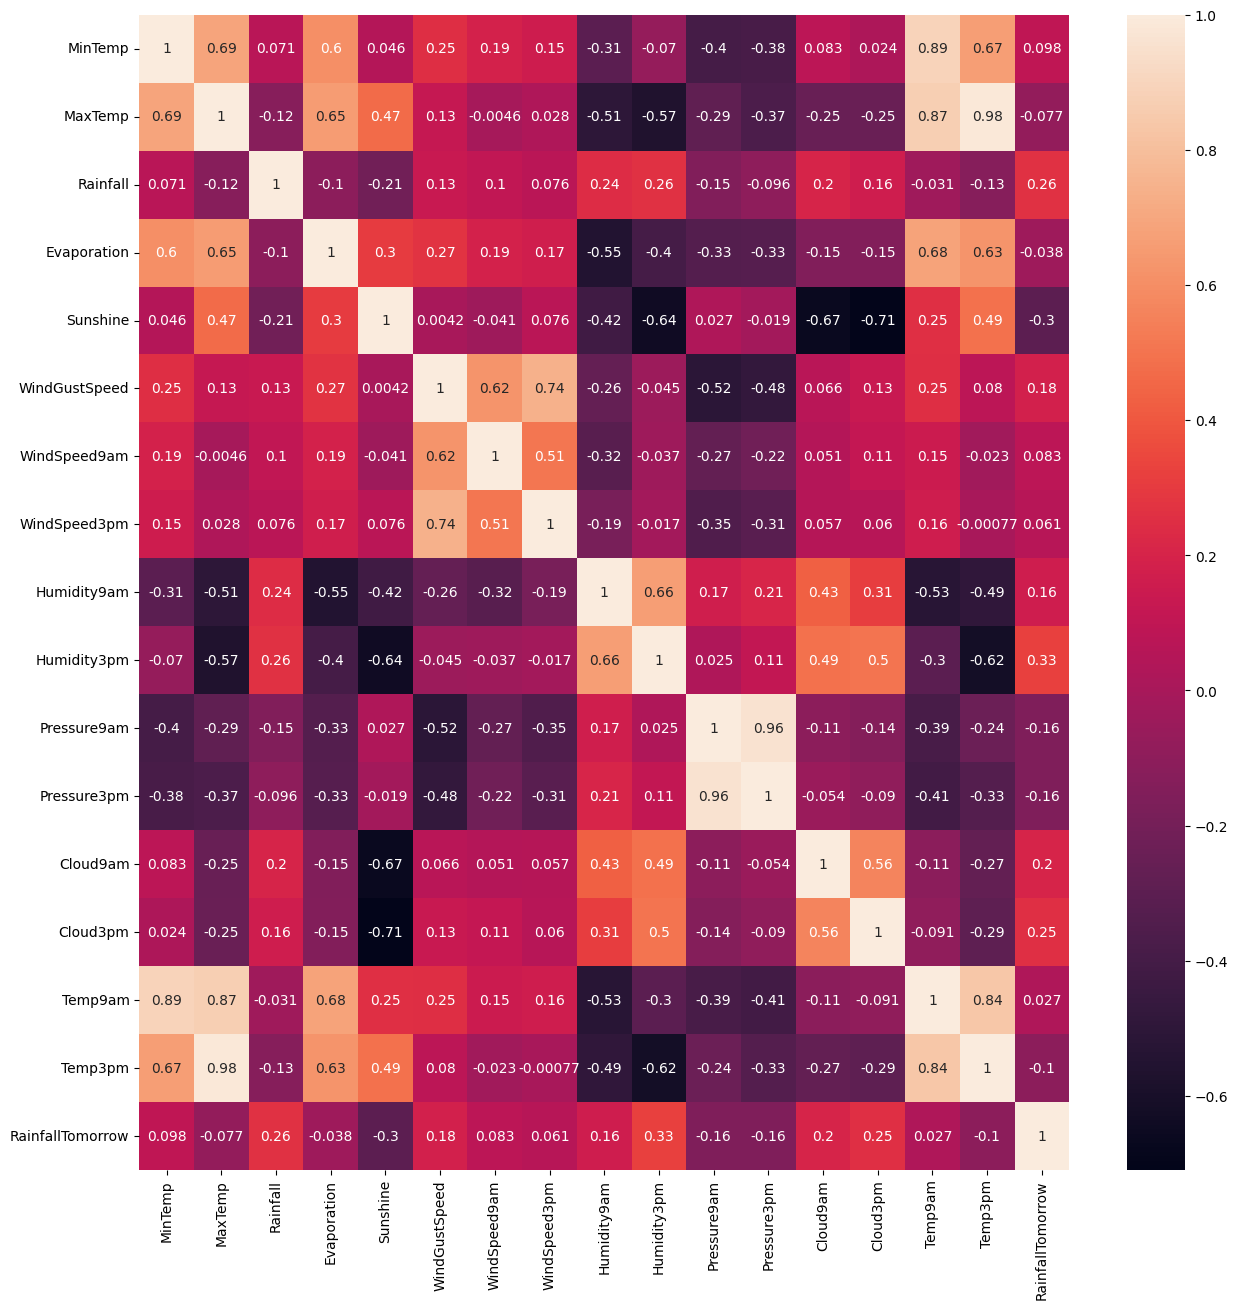

In [21]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    df_train[
        [
            "MinTemp",
            "MaxTemp",
            "Rainfall",
            "Evaporation",
            "Sunshine",
            "WindGustSpeed",
            "WindSpeed9am",
            "WindSpeed3pm",
            "Humidity9am",
            "Humidity3pm",
            "Pressure9am",
            "Pressure3pm",
            "Cloud9am",
            "Cloud3pm",
            "Temp9am",
            "Temp3pm",
            "RainfallTomorrow",
        ]
    ].corr(),
    annot=True,
)
plt.show()

Para rellenar valores nulos, decidi agregar una columna a mi df donde especifico el **Bimestre del año** al que pertenece cada registro, esto lo hago para tener de alguna manera los datos mas segmentados y no calcular una Media, Mediana, o lo que corresponda sobre todos los datos juntos ya que por ejemplo, las temperaturas, vientos, lluvias, etc. pueden no ser lo mismo al inicio del año como por la mitad o al final.


In [22]:
def determinar_bimestre(fecha):
    mes = fecha.month
    if 1 <= mes <= 2:
        return "Bimestre 1"
    elif 3 <= mes <= 4:
        return "Bimestre 2"
    elif 5 <= mes <= 6:
        return "Bimestre 3"
    elif 7 <= mes <= 8:
        return "Bimestre 4"
    elif 9 <= mes <= 10:
        return "Bimestre 5"
    else:
        return "Bimestre 6"

In [23]:
df_train["Bimestre"] = df_train["Date"].apply(lambda x: determinar_bimestre(x))

df_test["Bimestre"] = df_test["Date"].apply(lambda x: determinar_bimestre(x))

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\174503825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Bimestre"] = df_test["Date"].apply(lambda x: determinar_bimestre(x))


# Variable: Rainfall


In [24]:
print(df_train["Rainfall"].isnull().sum())

162


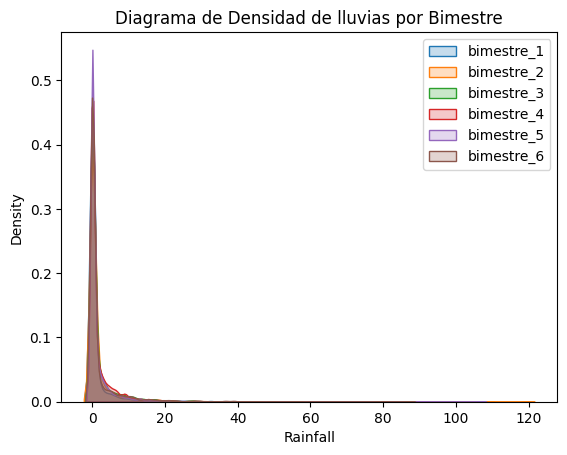

In [25]:
# Diagrama de densidades de la variable RainFall
bimestre_1 = df_train[df_train["Bimestre"] == "Bimestre 1"]
bimestre_2 = df_train[df_train["Bimestre"] == "Bimestre 2"]
bimestre_3 = df_train[df_train["Bimestre"] == "Bimestre 3"]
bimestre_4 = df_train[df_train["Bimestre"] == "Bimestre 4"]
bimestre_5 = df_train[df_train["Bimestre"] == "Bimestre 5"]
bimestre_6 = df_train[df_train["Bimestre"] == "Bimestre 6"]


bandwidth = 0.5
sns.kdeplot(
    data=bimestre_1["Rainfall"], fill=True, label="bimestre_1", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_2["Rainfall"], fill=True, label="bimestre_2", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_3["Rainfall"], fill=True, label="bimestre_3", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_4["Rainfall"], fill=True, label="bimestre_4", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_5["Rainfall"], fill=True, label="bimestre_5", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_6["Rainfall"], fill=True, label="bimestre_6", bw_adjust=bandwidth
)
plt.title("Diagrama de Densidad de lluvias por Bimestre")
plt.xlabel("Rainfall")
plt.legend()

Puedo apreciar que la densidad de lluvia no depende del bimestre, por lo que, en este caso, no haria falta hacer esta diferenciacion.


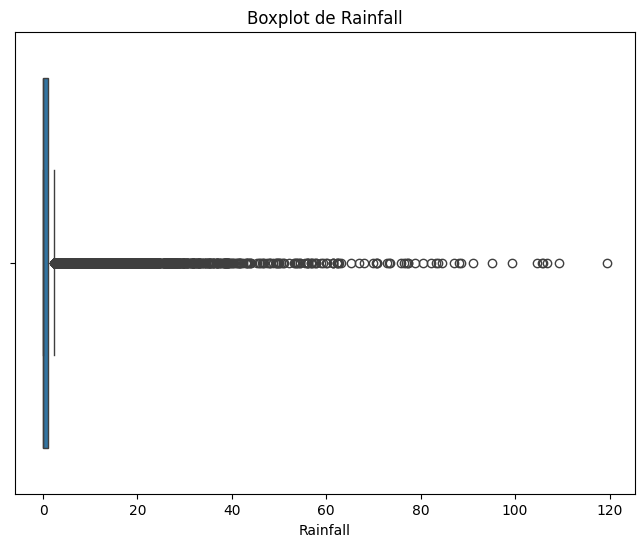

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Rainfall", data=df_train)
plt.title("Boxplot de Rainfall")
plt.show()

Veo una gran presencia de valores Outliers por lo que me inclino a usar la Mediana como medida para rellenar los valores nulos de la variable RainFall


In [27]:
mediana_por_dia_train = df_train.groupby(df["Date"].dt.date)["Rainfall"].median()

df_train["Rainfall"] = df_train.apply(
    lambda row: (
        mediana_por_dia_train[row["Date"].date()]
        if pd.isnull(row["Rainfall"])
        else row["Rainfall"]
    ),
    axis=1,
)

mediana_por_dia_test = df_test.groupby(df["Date"].dt.date)["Rainfall"].median()

df_test["Rainfall"] = df_test.apply(
    lambda row: (
        mediana_por_dia_test[row["Date"].date()]
        if pd.isnull(row["Rainfall"])
        else row["Rainfall"]
    ),
    axis=1,
)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\4147259352.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Rainfall"] = df_test.apply(


# Variable: Evaporation


In [28]:
print(df_train["Evaporation"].isnull().sum())

1240


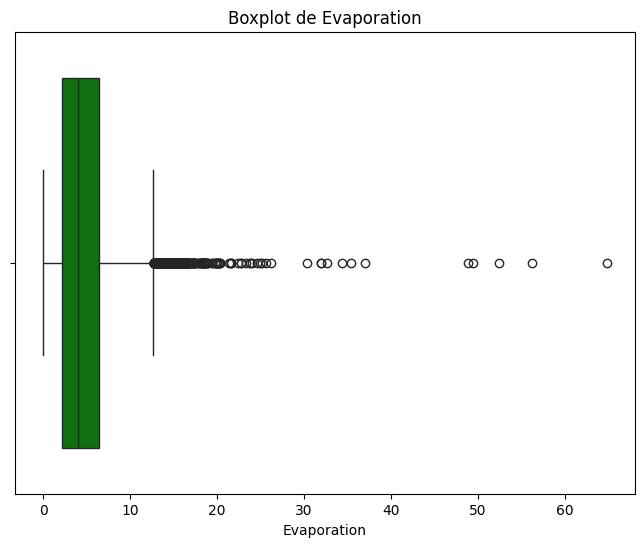

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Evaporation", data=df_train, color="green")
plt.title("Boxplot de Evaporation")
# plt.ylabel("MaxTemp")
plt.show()

Veo una gran presencia de valores Outliers por lo que me inclino a usar la Mediana como medida para rellenar los valores nulos de la variable **Evaporation**


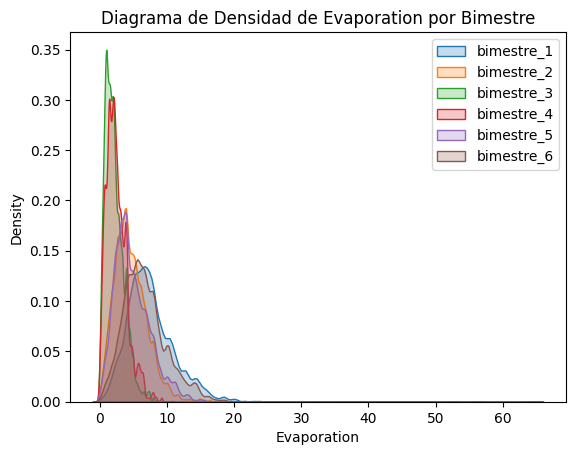

In [30]:
# Diagrama de densidades de la variable Evaporation
bimestre_1 = df_train[df_train["Bimestre"] == "Bimestre 1"]
bimestre_2 = df_train[df_train["Bimestre"] == "Bimestre 2"]
bimestre_3 = df_train[df_train["Bimestre"] == "Bimestre 3"]
bimestre_4 = df_train[df_train["Bimestre"] == "Bimestre 4"]
bimestre_5 = df_train[df_train["Bimestre"] == "Bimestre 5"]
bimestre_6 = df_train[df_train["Bimestre"] == "Bimestre 6"]


bandwidth = 0.5
sns.kdeplot(
    data=bimestre_1["Evaporation"], fill=True, label="bimestre_1", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_2["Evaporation"], fill=True, label="bimestre_2", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_3["Evaporation"], fill=True, label="bimestre_3", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_4["Evaporation"], fill=True, label="bimestre_4", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_5["Evaporation"], fill=True, label="bimestre_5", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_6["Evaporation"], fill=True, label="bimestre_6", bw_adjust=bandwidth
)
plt.title("Diagrama de Densidad de Evaporation por Bimestre")
plt.xlabel("Evaporation")
plt.legend()

En este caso se puede apreciar una variacion en la densidad de la variable Evaporation respecto del bimestre.


In [31]:
bim = df_train.groupby("Bimestre")
medians = bim["Evaporation"].median()

for bimestre, median in medians.items():
    df_train.loc[
        (df_train["Bimestre"] == bimestre) & (df_train["Evaporation"].isnull()),
        "Evaporation",
    ] = median


for bimestre, median in medians.items():
    df_test.loc[
        (df_test["Bimestre"] == bimestre) & (df_test["Evaporation"].isnull()),
        "Evaporation",
    ] = median

# Variable: Sunshine


In [32]:
print(df_train["Sunshine"].isnull().sum())

3331


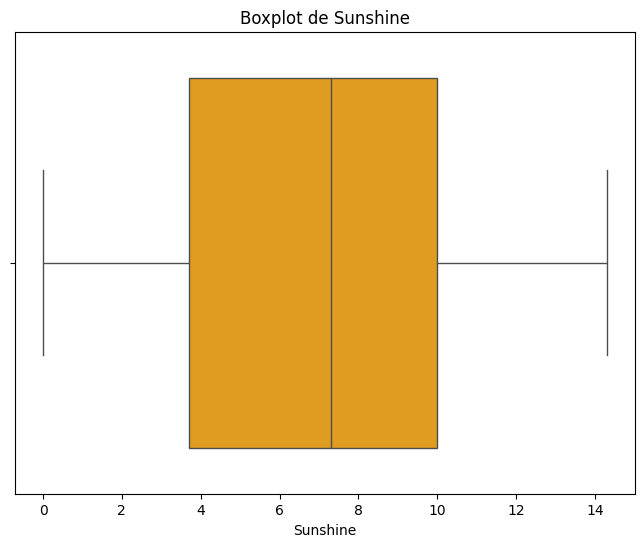

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sunshine", data=df_train, color="orange")
plt.title("Boxplot de Sunshine")
plt.show()

La distribucion de la variable Sunshine se ve bastante balanceada y sin presencia de outliers por lo que utilizo la **Media** para imputar a los valores nulos.


In [34]:
df_train["Sunshine"] = df_train.groupby(df_train["Date"].dt.day)["Sunshine"].transform(
    lambda x: x.fillna(x.mean())
)

df_test["Sunshine"] = df_test.groupby(df_test["Date"].dt.day)["Sunshine"].transform(
    lambda x: x.fillna(x.mean())
)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\1948954026.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Sunshine"] = df_test.groupby(df_test["Date"].dt.day)["Sunshine"].transform(


# Variables: WindGustDir, WindDir9am y WindDir3pm


In [35]:
print(df_train["WindGustDir"].isnull().sum())
print(df_train["WindDir9am"].isnull().sum())
print(df_train["WindDir3pm"].isnull().sum())

1482
1149
338


Relleno los valores faltantes para cada variable utilizando la **Moda** de cada dia.


In [36]:
df_train["WindGustDir"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindGustDir"
].transform(lambda x: x.fillna(x.mode().iloc[0]))
df_train["WindDir9am"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindDir9am"
].transform(lambda x: x.fillna(x.mode().iloc[0]))
df_train["WindDir3pm"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindDir3pm"
].transform(lambda x: x.fillna(x.mode().iloc[0]))


df_test["WindGustDir"] = df_test.groupby(df_test["Date"].dt.day)[
    "WindGustDir"
].transform(lambda x: x.fillna(x.mode().iloc[0]))
df_test["WindDir9am"] = df_test.groupby(df_test["Date"].dt.day)["WindDir9am"].transform(
    lambda x: x.fillna(x.mode().iloc[0])
)
df_test["WindDir3pm"] = df_test.groupby(df_test["Date"].dt.day)["WindDir3pm"].transform(
    lambda x: x.fillna(x.mode().iloc[0])
)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\2500600425.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["WindGustDir"] = df_test.groupby(df_test["Date"].dt.day)[
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\2500600425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["WindDir9am"] = df_test.groupby(df_test["Date"].dt.day)["WindDir9am"].transform(
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\2500600425.py:18: SettingWithCopyWarning: 
A value is trying to be 

# Variables: WindGustSpeed, WindSpeed9am y WindSpeed3pm


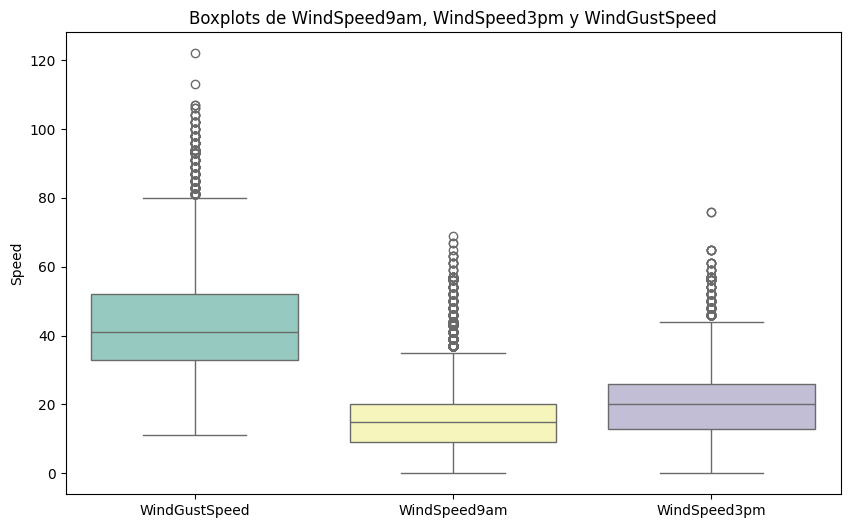

In [37]:
data_to_plot = df_train[["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot, palette="Set3")
plt.title("Boxplots de WindSpeed9am, WindSpeed3pm y WindGustSpeed")
plt.ylabel("Speed")
plt.show()

Se observa una gran presencia de outlaiers en las 3 variables por lo que procedo a imputar los valores nulos utilizando la **Mediana**.


In [38]:
df_train["WindGustSpeed"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindGustSpeed"
].transform(lambda x: x.fillna(x.median()))
df_train["WindSpeed9am"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindSpeed9am"
].transform(lambda x: x.fillna(x.median()))
df_train["WindSpeed3pm"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindGustSpeed"
].transform(lambda x: x.fillna(x.median()))


df_test["WindGustSpeed"] = df_test.groupby(df_test["Date"].dt.day)[
    "WindGustSpeed"
].transform(lambda x: x.fillna(x.median()))
df_test["WindSpeed9am"] = df_test.groupby(df_test["Date"].dt.day)[
    "WindSpeed9am"
].transform(lambda x: x.fillna(x.median()))
df_test["WindSpeed3pm"] = df_test.groupby(df_test["Date"].dt.day)[
    "WindGustSpeed"
].transform(lambda x: x.fillna(x.median()))

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\3221081509.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["WindGustSpeed"] = df_test.groupby(df_test["Date"].dt.day)[
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\3221081509.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["WindSpeed9am"] = df_test.groupby(df_test["Date"].dt.day)[
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\3221081509.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

Genero una nueva columna llamada 'Dif_WindSpeed' imputandole el valor correspondiente a la diferencia de las columnas 'WindSpeed9am' y 'WindSpeed3pm' **( 'WindSpeed9am' - 'WindSpeed3pm' )**


In [39]:
df_train["WindSpeed_Difference"] = df_train["WindSpeed9am"] - df_train["WindSpeed3pm"]
df_train.drop(["WindSpeed9am", "WindSpeed3pm"], axis=1, inplace=True)


df_test["WindSpeed_Difference"] = df_test["WindSpeed9am"] - df_test["WindSpeed3pm"]
df_test.drop(["WindSpeed9am", "WindSpeed3pm"], axis=1, inplace=True)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\2649069239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["WindSpeed_Difference"] = df_test["WindSpeed9am"] - df_test["WindSpeed3pm"]
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\2649069239.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(["WindSpeed9am", "WindSpeed3pm"], axis=1, inplace=True)


# Variables: Humidity9am, Humidity3pm, Cloud9am, Cloud3pm, Pressure9am y Pressure3pm


In [40]:
print(df_train["Humidity9am"].isnull().sum())
print(df_train["Humidity3pm"].isnull().sum())
print(df_train["Cloud9am"].isnull().sum())
print(df_train["Cloud3pm"].isnull().sum())
print(df_train["Pressure9am"].isnull().sum())
print(df_train["Pressure3pm"].isnull().sum())

265
222
4267
4527
279
273


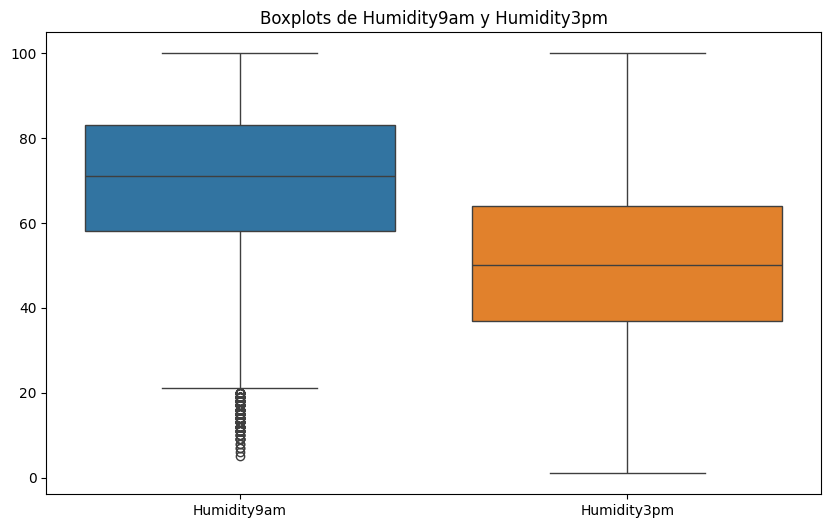

In [41]:
data_to_plot = df_train[["Humidity9am", "Humidity3pm"]]
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)
plt.title("Boxplots de Humidity9am y Humidity3pm")
plt.show()

In [42]:
df_train["Humidity9am"] = df_train.groupby(df_train["Date"].dt.day)[
    "Humidity9am"
].transform(lambda x: x.fillna(x.median()))
df_train["Humidity3pm"] = df_train.groupby(df_train["Date"].dt.day)[
    "Humidity3pm"
].transform(lambda x: x.fillna(x.median()))


df_test["Humidity9am"] = df_test.groupby(df_test["Date"].dt.day)[
    "Humidity9am"
].transform(lambda x: x.fillna(x.median()))
df_test["Humidity3pm"] = df_test.groupby(df_test["Date"].dt.day)[
    "Humidity3pm"
].transform(lambda x: x.fillna(x.median()))

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\1754395233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Humidity9am"] = df_test.groupby(df_test["Date"].dt.day)[
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\1754395233.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Humidity3pm"] = df_test.groupby(df_test["Date"].dt.day)[


Genero una nueva columna llamada 'Dif_Humidity' imputandole el valor correspondiente a la diferencia de las columnas 'Humidity9am' y 'HUmidity3pm' **( 'Humidity9am' - 'Humidity3pm' )**


In [43]:
df_train["Humidity_Difference"] = df_train["Humidity9am"] - df_train["Humidity3pm"]
df_train.drop(["Humidity9am", "Humidity3pm"], axis=1, inplace=True)


df_test["Humidity_Difference"] = df_test["Humidity9am"] - df_test["Humidity3pm"]
df_test.drop(["Humidity9am", "Humidity3pm"], axis=1, inplace=True)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\3412917262.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Humidity_Difference"] = df_test["Humidity9am"] - df_test["Humidity3pm"]
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\3412917262.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(["Humidity9am", "Humidity3pm"], axis=1, inplace=True)


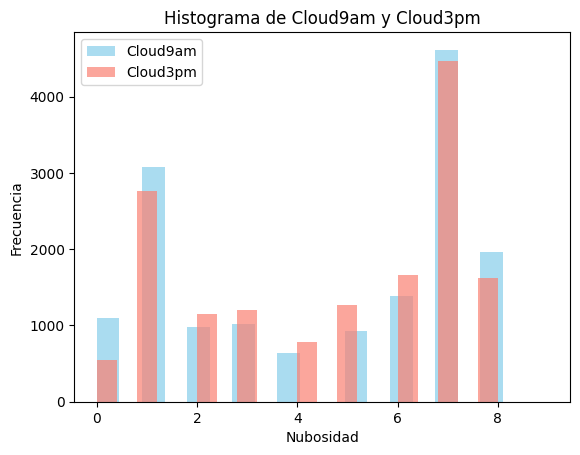

In [44]:
plt.hist(df_train["Cloud9am"], bins=20, color="skyblue", alpha=0.7, label="Cloud9am")
plt.hist(df_train["Cloud3pm"], bins=20, color="salmon", alpha=0.7, label="Cloud3pm")
plt.xlabel("Nubosidad")
plt.ylabel("Frecuencia")
plt.title("Histograma de Cloud9am y Cloud3pm")
plt.legend()
plt.show()

In [45]:
df_train["Cloud9am"] = df_train.groupby(df_train["Date"].dt.day)["Cloud9am"].transform(
    lambda x: x.fillna(x.median())
)
df_train["Cloud3pm"] = df_train.groupby(df_train["Date"].dt.day)["Cloud3pm"].transform(
    lambda x: x.fillna(x.median())
)


df_test["Cloud9am"] = df_test.groupby(df_test["Date"].dt.day)["Cloud9am"].transform(
    lambda x: x.fillna(x.median())
)
df_test["Cloud3pm"] = df_test.groupby(df_test["Date"].dt.day)["Cloud3pm"].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\3481929352.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Cloud9am"] = df_test.groupby(df_test["Date"].dt.day)["Cloud9am"].transform(
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\3481929352.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Cloud3pm"] = df_test.groupby(df_test["Date"].dt.day)["Cloud3pm"].transform(


Genero una nueva columna llamada 'Dif_Cloud' imputandole el valor correspondiente a la diferencia de las columnas 'Humidity9am' y 'HUmidity3pm' **( 'Cloud9am' - 'Cloud3pm' )**


In [46]:
df_train["Cloud_Difference"] = df_train["Cloud9am"] - df_train["Cloud3pm"]
df_train.drop(["Cloud9am", "Cloud3pm"], axis=1, inplace=True)


df_test["Cloud_Difference"] = df_test["Cloud9am"] - df_test["Cloud3pm"]
df_test.drop(["Cloud9am", "Cloud3pm"], axis=1, inplace=True)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\895804715.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Cloud_Difference"] = df_test["Cloud9am"] - df_test["Cloud3pm"]
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\895804715.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(["Cloud9am", "Cloud3pm"], axis=1, inplace=True)


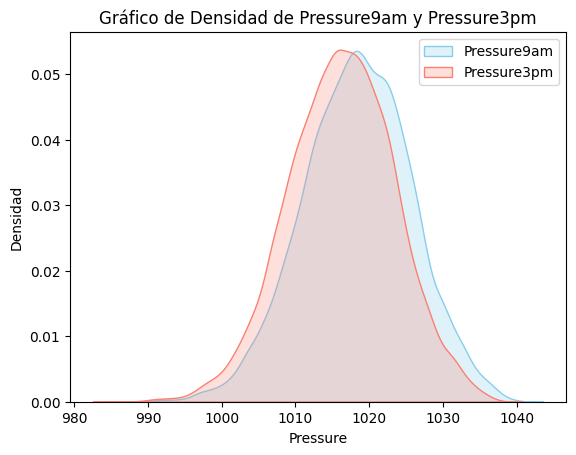

In [47]:
sns.kdeplot(df_train["Pressure9am"], color="skyblue", label="Pressure9am", fill=True)
sns.kdeplot(df_train["Pressure3pm"], color="salmon", label="Pressure3pm", fill=True)
plt.xlabel("Pressure")
plt.ylabel("Densidad")
plt.title("Gráfico de Densidad de Pressure9am y Pressure3pm")
plt.legend()
plt.show()

Observando la distribucion de las variables 'Pressure9am' y 'Pressure3pm' se observa una distribucion normal, por lo que decido imputar los valores nulos utilizando la **Media**.


In [48]:
df_train["Pressure9am"] = df_train.groupby(df_train["Date"].dt.day)[
    "Pressure9am"
].transform(lambda x: x.fillna(x.mean()))
df_train["Pressure3pm"] = df_train.groupby(df_train["Date"].dt.day)[
    "Pressure3pm"
].transform(lambda x: x.fillna(x.mean()))


df_test["Pressure9am"] = df_test.groupby(df_test["Date"].dt.day)[
    "Pressure9am"
].transform(lambda x: x.fillna(x.mean()))
df_test["Pressure3pm"] = df_test.groupby(df_test["Date"].dt.day)[
    "Pressure3pm"
].transform(lambda x: x.fillna(x.mean()))

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\2298753384.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Pressure9am"] = df_test.groupby(df_test["Date"].dt.day)[
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\2298753384.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Pressure3pm"] = df_test.groupby(df_test["Date"].dt.day)[


Genero una nueva columna llamada 'Dif_Pressure' imputandole el valor correspondiente a la diferencia de las columnas 'Pressure9am' y 'Pressure3pm' **( 'Pressure9am' - 'Pressure3pm' )**


In [49]:
df_train["Pressure_Difference"] = df_train["Pressure9am"] - df_train["Pressure3pm"]
df_train.drop(["Pressure9am", "Pressure3pm"], axis=1, inplace=True)


df_test["Pressure_Difference"] = df_test["Pressure9am"] - df_test["Pressure3pm"]
df_test.drop(["Pressure9am", "Pressure3pm"], axis=1, inplace=True)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\2911089513.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Pressure_Difference"] = df_test["Pressure9am"] - df_test["Pressure3pm"]
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\2911089513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(["Pressure9am", "Pressure3pm"], axis=1, inplace=True)


# Variables: MaxTemp, MinTemp, Temp9am y Temp3pm


In [50]:
df_train

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Bimestre,WindSpeed_Difference,Humidity_Difference,Cloud_Difference,Pressure_Difference
6047,2009-01-01,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,26.6,33.4,No,No,0.0,Bimestre 1,-42.0,7.0,-3.0,1.900000
6048,2009-01-02,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,20.3,27.0,No,No,0.0,Bimestre 1,-18.0,22.0,0.0,0.800000
6049,2009-01-03,15.5,34.1,0.0,12.6,13.3,SE,30.0,N,N,NaN,32.7,No,No,0.0,Bimestre 1,-15.0,64.0,5.0,7.579503
6050,2009-01-04,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,28.7,34.9,No,No,0.0,Bimestre 1,-16.0,20.0,-5.0,3.100000
6051,2009-01-05,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,29.1,35.6,No,No,0.0,Bimestre 1,-25.0,15.0,-4.0,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101974,2015-12-27,6.1,22.0,0.0,4.6,11.2,SSW,39.0,SSW,S,17.0,19.9,No,No,0.0,Bimestre 6,-24.0,11.0,-1.0,-0.500000
101975,2015-12-28,7.0,25.3,0.0,5.6,13.6,SSW,44.0,ESE,S,17.1,23.4,No,No,0.0,Bimestre 6,-27.0,14.0,1.0,2.500000
101976,2015-12-29,8.2,31.3,0.0,6.6,13.6,SW,41.0,ENE,SSW,18.3,28.7,No,No,0.0,Bimestre 6,-26.0,26.0,0.0,3.500000
101977,2015-12-30,9.0,38.1,0.0,4.8,13.6,W,50.0,NNE,W,26.3,36.1,No,No,0.0,Bimestre 6,-28.0,18.0,0.0,3.400000


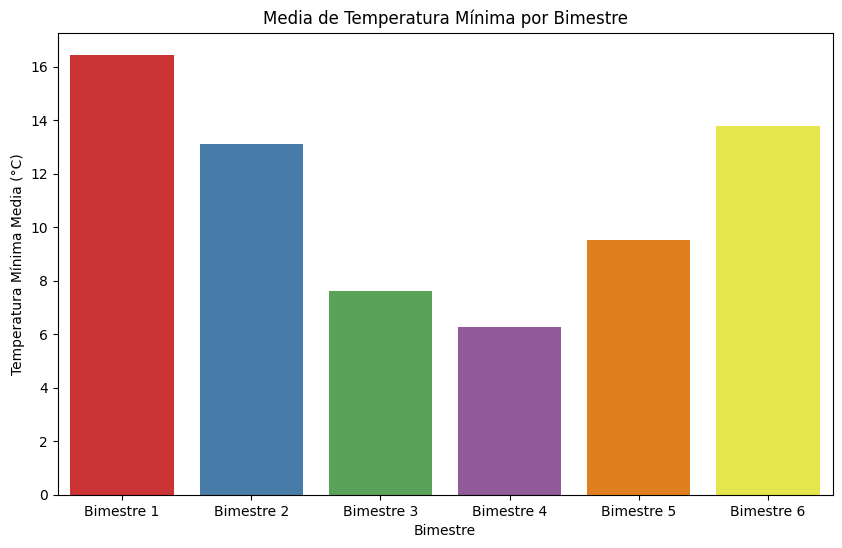

In [51]:
# Calcula la media de temperatura mínima para cada bimestre
mean_temps = df_train.groupby("Bimestre")["MinTemp"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Bimestre",
    y="MinTemp",
    data=mean_temps,
    hue="Bimestre",
    palette="Set1",
    dodge=False,
    legend=False,
)
plt.title("Media de Temperatura Mínima por Bimestre")
plt.xlabel("Bimestre")
plt.ylabel("Temperatura Mínima Media (°C)")
plt.show()

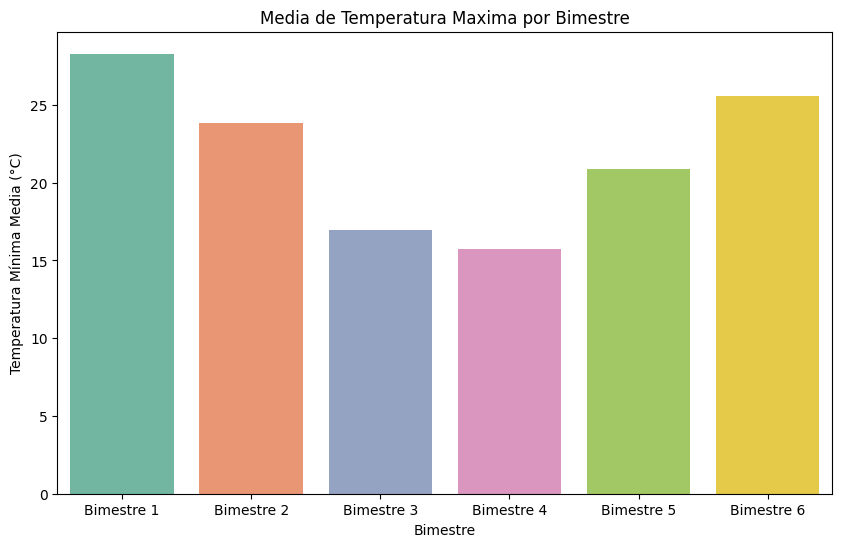

In [52]:
# Calcula la media de temperatura mínima para cada bimestre
mean_temps = df_train.groupby("Bimestre")["MaxTemp"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Bimestre",
    y="MaxTemp",
    data=mean_temps,
    hue="Bimestre",
    palette="Set2",
    dodge=False,
    legend=False,
)
plt.title("Media de Temperatura Maxima por Bimestre")
plt.xlabel("Bimestre")
plt.ylabel("Temperatura Mínima Media (°C)")
plt.show()

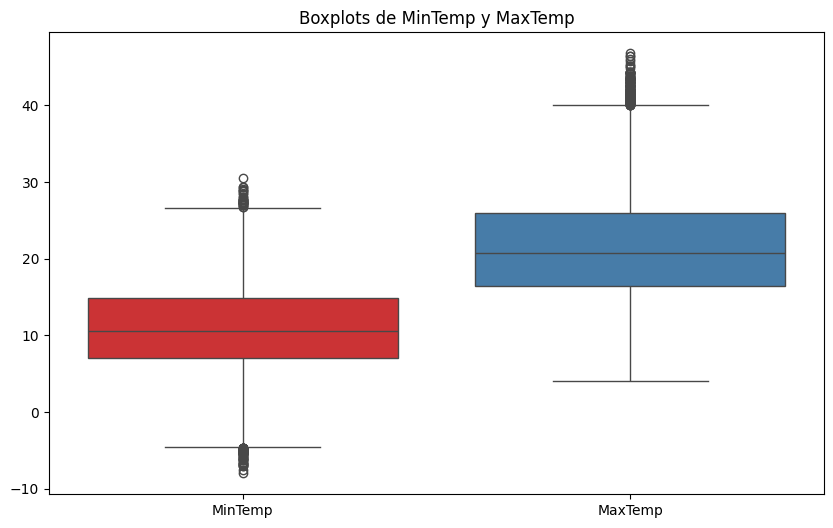

In [53]:
data_to_plot = df_train[["MinTemp", "MaxTemp"]]
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot, palette="Set1")
plt.title("Boxplots de MinTemp y MaxTemp")
plt.show()

Puedo apreciar variaciones en los valores tanto en la variable MinTemp como MaxTemp dependiendo del bimestre del año, a la vez observo outliers por lo que en este caso decido rellenar los valores nulos con la Mediana del bimestre correspondiente a cada registro.


In [54]:
median_min_temp_by_bimestre_train = df_train.groupby("Bimestre")["MinTemp"].median()

for bimestre, median_temp in median_min_temp_by_bimestre_train.items():
    df_train.loc[df_train["Bimestre"] == bimestre, "MinTemp"] = df_train.loc[
        df_train["Bimestre"] == bimestre, "MinTemp"
    ].fillna(median_temp)

for bimestre, median_temp in median_min_temp_by_bimestre_train.items():
    df_test.loc[df_test["Bimestre"] == bimestre, "MinTemp"] = df_test.loc[
        df_test["Bimestre"] == bimestre, "MinTemp"
    ].fillna(median_temp)


median_max_temp_by_bimestre_train = df_train.groupby("Bimestre")["MaxTemp"].median()

for bimestre, median_temp in median_max_temp_by_bimestre_train.items():
    df_train.loc[df_train["Bimestre"] == bimestre, "MaxTemp"] = df_train.loc[
        df_train["Bimestre"] == bimestre, "MaxTemp"
    ].fillna(median_temp)

for bimestre, median_temp in median_max_temp_by_bimestre_train.items():
    df_test.loc[df_test["Bimestre"] == bimestre, "MaxTemp"] = df_test.loc[
        df_test["Bimestre"] == bimestre, "MaxTemp"
    ].fillna(median_temp)

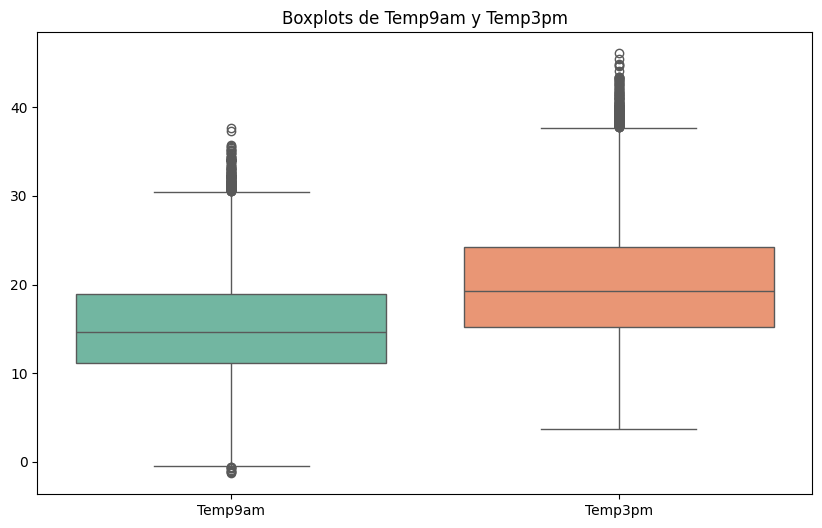

In [55]:
data_to_plot = df_train[["Temp9am", "Temp3pm"]]
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot, palette="Set2")
plt.title("Boxplots de Temp9am y Temp3pm")
plt.show()

Completo los valores nulos de Temp9am y Temp3pm con la mediana por dia debido a la presencia de outliers.


In [56]:
df_train["Temp9am"] = df_train.groupby(df_train["Date"].dt.day)["Temp9am"].transform(
    lambda x: x.fillna(x.median())
)
df_train["Temp3pm"] = df_train.groupby(df_train["Date"].dt.day)["Temp3pm"].transform(
    lambda x: x.fillna(x.median())
)


df_test["Temp9am"] = df_test.groupby(df_test["Date"].dt.day)["Temp9am"].transform(
    lambda x: x.fillna(x.median())
)
df_test["Temp3pm"] = df_test.groupby(df_test["Date"].dt.day)["Temp3pm"].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\1018218177.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Temp9am"] = df_test.groupby(df_test["Date"].dt.day)["Temp9am"].transform(
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\1018218177.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Temp3pm"] = df_test.groupby(df_test["Date"].dt.day)["Temp3pm"].transform(


In [57]:
df_train.isna().sum()

Date                      0
MinTemp                   0
MaxTemp                   0
Rainfall                  0
Evaporation               0
Sunshine                  0
WindGustDir               0
WindGustSpeed             0
WindDir9am                0
WindDir3pm                0
Temp9am                   0
Temp3pm                   0
RainToday               162
RainTomorrow              0
RainfallTomorrow          0
Bimestre                  0
WindSpeed_Difference      0
Humidity_Difference       0
Cloud_Difference          0
Pressure_Difference       0
dtype: int64

Genero una nueva columna llamada 'Dif_Temp' imputandole el valor correspondiente a la diferencia de las columnas 'Temp3pm' y 'Temp9am' **( 'Temp3pm' - 'Temp9am' )**


In [58]:
df_train["Temp_Difference"] = df_train["Temp3pm"] - df_train["Temp9am"]
df_train.drop(["Temp3pm", "Temp9am"], axis=1, inplace=True)


df_test["Temp_Difference"] = df_test["Temp3pm"] - df_test["Temp9am"]
df_test.drop(["Temp3pm", "Temp9am"], axis=1, inplace=True)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\2551757132.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Temp_Difference"] = df_test["Temp3pm"] - df_test["Temp9am"]
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\2551757132.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(["Temp3pm", "Temp9am"], axis=1, inplace=True)


Genero una nueva columna llamada 'Dif_Temp_Max_Min' imputandole el valor correspondiente a la diferencia de las columnas 'MaxTemp' y 'MinTemp' **( 'MaxTemp' - 'MinTemp' )**


In [59]:
df_train["Dif_Temp_Max_Min"] = df_train["MaxTemp"] - df_train["MinTemp"]
df_train.drop(["MaxTemp", "MinTemp"], axis=1, inplace=True)

df_test["Dif_Temp_Max_Min"] = df_test["MaxTemp"] - df_test["MinTemp"]
df_test.drop(["MaxTemp", "MinTemp"], axis=1, inplace=True)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\2282185811.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Dif_Temp_Max_Min"] = df_test["MaxTemp"] - df_test["MinTemp"]
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\2282185811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(["MaxTemp", "MinTemp"], axis=1, inplace=True)


# Variables: RainToday y RainTomorrow


Relleno los valores nulos de 'RainToday' con la **Moda** por dia.


In [60]:
print(df_train["RainToday"].isna().sum())
print(df_train["RainTomorrow"].isna().sum())
print(df_train["RainfallTomorrow"].isna().sum())

162
0
0


In [61]:
moda_RainToday_train = df_train.groupby("Date")["RainToday"].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
df_train["RainToday"] = df_train["RainToday"].fillna(moda_RainToday_train)

moda_RainToday_test = df_test.groupby("Date")["RainToday"].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
df_test["RainToday"] = df_test["RainToday"].fillna(moda_RainToday_test)


moda_RainTomorrow_test = df_test.groupby("Date")["RainTomorrow"].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
df_test["RainTomorrow"] = df_test["RainTomorrow"].fillna(moda_RainTomorrow_test)

moda_RainfallTomorrow_test = df_test.groupby("Date")["RainfallTomorrow"].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
df_test["RainfallTomorrow"] = df_test["RainfallTomorrow"].fillna(
    moda_RainfallTomorrow_test
)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\2738604382.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["RainToday"] = df_test["RainToday"].fillna(moda_RainToday_test)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\2738604382.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["RainTomorrow"] = df_test["RainTomorrow"].fillna(moda_RainTomorrow_test)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\2738604382.py:20: SettingWithCopyWarning: 
A value is trying to be set

In [62]:
df_test.isna().sum()

Date                    0
Rainfall                0
Evaporation             0
Sunshine                0
WindGustDir             0
WindGustSpeed           0
WindDir9am              0
WindDir3pm              0
RainToday               0
RainTomorrow            0
RainfallTomorrow        0
Bimestre                0
WindSpeed_Difference    0
Humidity_Difference     0
Cloud_Difference        0
Pressure_Difference     0
Temp_Difference         0
Dif_Temp_Max_Min        0
dtype: int64

In [63]:
print(df_train["RainToday"].isna().sum())
print(df_train["RainTomorrow"].isna().sum())
print(df_train["RainfallTomorrow"].isna().sum())

0
0
0


La columna 'RainToday' y 'RainTomorrow' tienen valores 'Yes' 'No' por lo que los mapeo a 1 para 'Yes' y 0 para 'No'.


In [64]:
df_train["RainToday"] = df_train["RainToday"].map({"Yes": 1, "No": 0})
df_train["RainTomorrow"] = df_train["RainTomorrow"].map({"Yes": 1, "No": 0})


df_test["RainToday"] = df_test["RainToday"].map({"Yes": 1, "No": 0})
df_test["RainTomorrow"] = df_test["RainTomorrow"].map({"Yes": 1, "No": 0})

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\3786583145.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["RainToday"] = df_test["RainToday"].map({"Yes": 1, "No": 0})
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\3786583145.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["RainTomorrow"] = df_test["RainTomorrow"].map({"Yes": 1, "No": 0})


In [65]:
df_train.isna().sum()

Date                    0
Rainfall                0
Evaporation             0
Sunshine                0
WindGustDir             0
WindGustSpeed           0
WindDir9am              0
WindDir3pm              0
RainToday               0
RainTomorrow            0
RainfallTomorrow        0
Bimestre                0
WindSpeed_Difference    0
Humidity_Difference     0
Cloud_Difference        0
Pressure_Difference     0
Temp_Difference         0
Dif_Temp_Max_Min        0
dtype: int64

# Dummies


In [66]:
df_train["WindGustDir"].unique()

array(['SSW', 'S', 'SE', 'NNE', 'WNW', 'N', 'ENE', 'NE', 'E', 'SW', 'W',
       'WSW', 'NNW', 'ESE', 'SSE', 'NW'], dtype=object)

In [67]:
df_train

,Date,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,RainfallTomorrow,Bimestre,WindSpeed_Difference,Humidity_Difference,Cloud_Difference,Pressure_Difference,Temp_Difference,Dif_Temp_Max_Min
6047,2009-01-01,0.0,12.0,12.3,SSW,48.0,ENE,SW,0,0,0.0,Bimestre 1,-42.0,7.0,-3.0,1.900000,6.8,17.3
6048,2009-01-02,0.0,14.8,13.0,S,37.0,SSE,SSE,0,0,0.0,Bimestre 1,-18.0,22.0,0.0,0.800000,6.7,10.5
6049,2009-01-03,0.0,12.6,13.3,SE,30.0,N,N,0,0,0.0,Bimestre 1,-15.0,64.0,5.0,7.579503,18.3,18.6
6050,2009-01-04,0.0,10.8,10.6,NNE,46.0,NNE,NNW,0,0,0.0,Bimestre 1,-16.0,20.0,-5.0,3.100000,6.2,18.2
6051,2009-01-05,0.0,11.4,12.2,WNW,31.0,WNW,WSW,0,0,0.0,Bimestre 1,-25.0,15.0,-4.0,3.600000,6.5,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101974,2015-12-27,0.0,4.6,11.2,SSW,39.0,SSW,S,0,0,0.0,Bimestre 6,-24.0,11.0,-1.0,-0.500000,2.9,15.9
101975,2015-12-28,0.0,5.6,13.6,SSW,44.0,ESE,S,0,0,0.0,Bimestre 6,-27.0,14.0,1.0,2.500000,6.3,18.3
101976,2015-12-29,0.0,6.6,13.6,SW,41.0,ENE,SSW,0,0,0.0,Bimestre 6,-26.0,26.0,0.0,3.500000,10.4,23.1
101977,2015-12-30,0.0,4.8,13.6,W,50.0,NNE,W,0,0,0.0,Bimestre 6,-28.0,18.0,0.0,3.400000,9.8,29.1


In [68]:
orien = [
    "SSW",
    "S",
    "SE",
    "NNE",
    "WNW",
    "N",
    "ENE",
    "NE",
    "E",
    "SW",
    "W",
    "WSW",
    "NNW",
    "ESE",
    "SSE",
    "NW",
]
print(len(orien))

16


Agrupo los valores de la variables categoricas de Direccion, que tiene los siguientes valores:

['SSW', 'S', 'SE', 'NNE', 'WNW', 'N', 'ENE', 'NE', 'E', 'SW', 'W', 'WSW', 'NNW', 'ESE', 'SSE', 'NW']

El criterio que empleo es asignar a cada punto cardenal el predominante, por ejemplo 'NNW' lo asigno a 'N'

Para los valores como, por ejemplo 'NE' o 'SW' los asigno al ultimo punto cardinal de la notacion.


In [69]:
def agrupar_direcciones(direccion):
    grupos_principales = {
        "N": ["N", "NNW", "NNE"],
        "S": ["S", "SSW", "SSE"],
        "E": ["E", "ENE", "ESE", "SE", "NE"],
        "W": ["W", "WNW", "WSW", "SW", "NW"],
    }

    for grupo, direcciones in grupos_principales.items():
        if direccion in direcciones:
            return grupo

    return "Otro"

In [70]:
df_train["WindGustDir_Agrupado"] = df_train["WindGustDir"].apply(agrupar_direcciones)
df_train["WindDir9am_Agrupado"] = df_train["WindDir9am"].apply(agrupar_direcciones)
df_train["WindDir3pm_Agrupado"] = df_train["WindDir3pm"].apply(agrupar_direcciones)

df_test["WindGustDir_Agrupado"] = df_test["WindGustDir"].apply(agrupar_direcciones)
df_test["WindDir9am_Agrupado"] = df_test["WindDir9am"].apply(agrupar_direcciones)
df_test["WindDir3pm_Agrupado"] = df_test["WindDir3pm"].apply(agrupar_direcciones)


df_train = df_train.drop("WindGustDir", axis=1)
df_train = df_train.drop("WindDir9am", axis=1)
df_train = df_train.drop("WindDir3pm", axis=1)

df_test = df_test.drop("WindGustDir", axis=1)
df_test = df_test.drop("WindDir9am", axis=1)
df_test = df_test.drop("WindDir3pm", axis=1)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\1341930653.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["WindGustDir_Agrupado"] = df_test["WindGustDir"].apply(agrupar_direcciones)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\1341930653.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["WindDir9am_Agrupado"] = df_test["WindDir9am"].apply(agrupar_direcciones)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_32612\1341930653.py:7: SettingWithCopyWarning: 
A value is tryin

Dummies WindGustDir


In [71]:
d_WindGustDir_train = pd.get_dummies(
    df_train["WindGustDir_Agrupado"], dtype=int, drop_first=True
)

d_WindGustDir_train = d_WindGustDir_train.rename(
    columns={"N": "WindGustDir_N", "S": "WindGustDir_S", "W": "WindGustDir_W"}
)
df_train = df_train.drop("WindGustDir_Agrupado", axis=1)
df_train = pd.concat([df_train, d_WindGustDir_train], axis=1)


d_WindGustDir_test = pd.get_dummies(
    df_test["WindGustDir_Agrupado"], dtype=int, drop_first=True
)

d_WindGustDir_test = d_WindGustDir_test.rename(
    columns={"N": "WindGustDir_N", "S": "WindGustDir_S", "W": "WindGustDir_W"}
)
df_test = df_test.drop("WindGustDir_Agrupado", axis=1)
df_test = pd.concat([df_test, d_WindGustDir_test], axis=1)

Dummies WindDir9am


In [72]:
d_WindDir9am_train = pd.get_dummies(
    df_train["WindDir9am_Agrupado"], dtype=int, drop_first=True
)
d_WindDir9am_train = d_WindDir9am_train.rename(
    columns={"N": "WindDir9am_N", "S": "WindDir9am_S", "W": "WindDir9am_W"}
)
df_train = df_train.drop("WindDir9am_Agrupado", axis=1)
df_train = pd.concat([df_train, d_WindDir9am_train], axis=1)


d_WindDir9am_test = pd.get_dummies(
    df_test["WindDir9am_Agrupado"], dtype=int, drop_first=True
)
d_WindDir9am_test = d_WindDir9am_test.rename(
    columns={"N": "WindDir9am_N", "S": "WindDir9am_S", "W": "WindDir9am_W"}
)
df_test = df_test.drop("WindDir9am_Agrupado", axis=1)
df_test = pd.concat([df_test, d_WindDir9am_test], axis=1)

Dummies WindDir3pm


In [73]:
d_WindDir3pm_train = pd.get_dummies(
    df_train["WindDir3pm_Agrupado"], dtype=int, drop_first=True
)
d_WindDir3pm_train = d_WindDir3pm_train.rename(
    columns={"N": "WindDir3pm_N", "S": "WindDir3pm_S", "W": "WindDir3pm_W"}
)
df_train = df_train.drop("WindDir3pm_Agrupado", axis=1)
df_train = pd.concat([df_train, d_WindDir3pm_train], axis=1)


d_WindDir3pm_test = pd.get_dummies(
    df_test["WindDir3pm_Agrupado"], dtype=int, drop_first=True
)
d_WindDir3pm_test = d_WindDir3pm_test.rename(
    columns={"N": "WindDir3pm_N", "S": "WindDir3pm_S", "W": "WindDir3pm_W"}
)
df_test = df_test.drop("WindDir3pm_Agrupado", axis=1)
df_test = pd.concat([df_test, d_WindDir3pm_test], axis=1)

In [74]:
df_train.drop("Bimestre", axis=1, inplace=True)
df_train.drop("Date", axis=1, inplace=True)

df_test.drop("Bimestre", axis=1, inplace=True)
df_test.drop("Date", axis=1, inplace=True)

In [75]:
columnas = df_train.columns
print(columnas)
print(len(columnas))

Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'RainToday',
       'RainTomorrow', 'RainfallTomorrow', 'WindSpeed_Difference',
       'Humidity_Difference', 'Cloud_Difference', 'Pressure_Difference',
       'Temp_Difference', 'Dif_Temp_Max_Min', 'WindGustDir_N', 'WindGustDir_S',
       'WindGustDir_W', 'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W',
       'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W'],
      dtype='object')
22


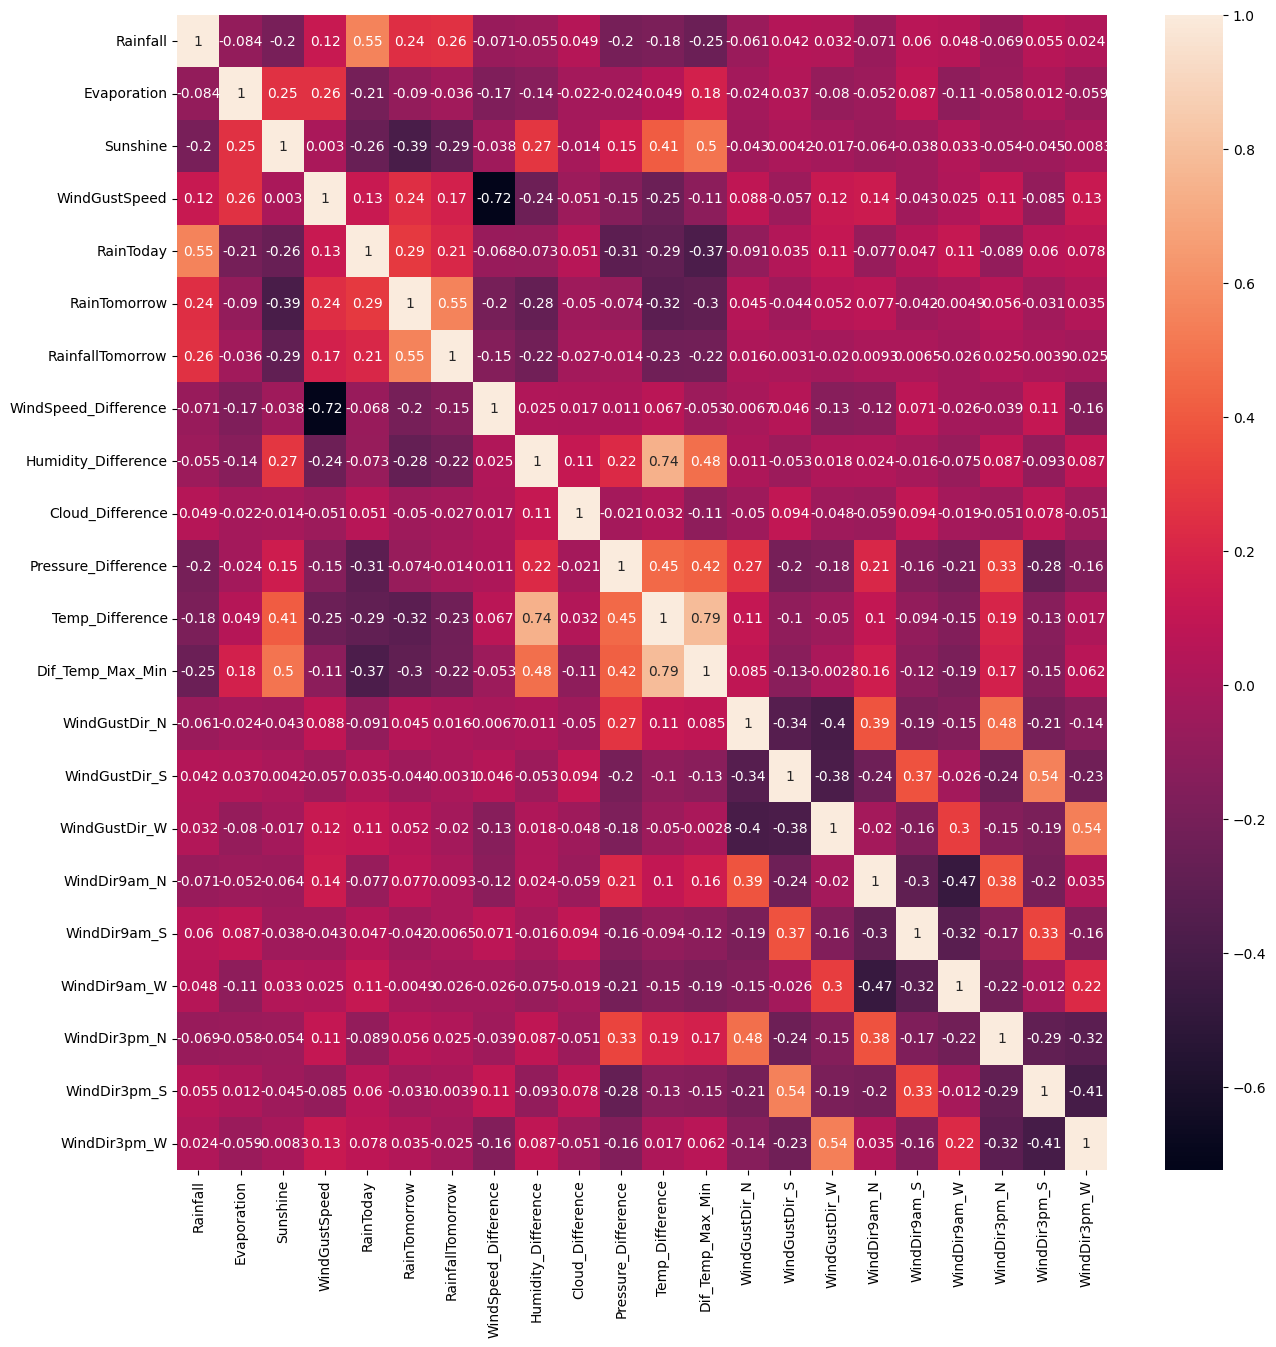

In [76]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    df_train.corr(),
    annot=True,
)
plt.show()

In [77]:
df_train.isna().sum()

Rainfall                0
Evaporation             0
Sunshine                0
WindGustSpeed           0
RainToday               0
RainTomorrow            0
RainfallTomorrow        0
WindSpeed_Difference    0
Humidity_Difference     0
Cloud_Difference        0
Pressure_Difference     0
Temp_Difference         0
Dif_Temp_Max_Min        0
WindGustDir_N           0
WindGustDir_S           0
WindGustDir_W           0
WindDir9am_N            0
WindDir9am_S            0
WindDir9am_W            0
WindDir3pm_N            0
WindDir3pm_S            0
WindDir3pm_W            0
dtype: int64

# Estandarizacion de datos


In [78]:
# df_train
scaler = StandardScaler()
df_train_estandarizado = scaler.fit_transform(df_train)
df_train_estandarizado = pd.DataFrame(df_train_estandarizado, columns=df_train.columns)

# df_test
scaler = StandardScaler()
df_test_estandarizado = scaler.fit_transform(df_test)
df_test_estandarizado = pd.DataFrame(df_test_estandarizado, columns=df_test.columns)

# Regularizacion de datos

In [79]:
# X, y TRAIN
X_train = df_train_estandarizado[
    [
        "Rainfall",
        "Evaporation",
        "Sunshine",
        "WindGustSpeed",
        "RainToday",
        "WindSpeed_Difference",
        "Humidity_Difference",
        "Cloud_Difference",
        "Pressure_Difference",
        "Temp_Difference",
        "Dif_Temp_Max_Min",
        "WindGustDir_N",
        "WindGustDir_S",
        "WindGustDir_W",
        "WindDir9am_N",
        "WindDir9am_S",
        "WindDir9am_W",
        "WindDir3pm_N",
        "WindDir3pm_S",
        "WindDir3pm_W",
    ]
]
y_train = df_train_estandarizado["RainfallTomorrow"]

# X, y TEST

X_test = df_test_estandarizado[
    [
        "Rainfall",
        "Evaporation",
        "Sunshine",
        "WindGustSpeed",
        "RainToday",
        "WindSpeed_Difference",
        "Humidity_Difference",
        "Cloud_Difference",
        "Pressure_Difference",
        "Temp_Difference",
        "Dif_Temp_Max_Min",
        "WindGustDir_N",
        "WindGustDir_S",
        "WindGustDir_W",
        "WindDir9am_N",
        "WindDir9am_S",
        "WindDir9am_W",
        "WindDir3pm_N",
        "WindDir3pm_S",
        "WindDir3pm_W",
    ]
]
y_test = df_test_estandarizado["RainfallTomorrow"]

## Lasso


In [80]:
lasso = Lasso(alpha=0.1)  # alpha controla la fuerza de la regularización L1 (Lasso)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [81]:
print("\nCoeficientes del modelo Lasso:")
print(lasso.coef_)
print("Lasso Score df_train:", lasso.score(X_test, y_test))
print("Lasso Score df_test:", lasso.score(X_test, y_test))


Coeficientes del modelo Lasso:
[ 0.12155352 -0.         -0.14470672  0.0267217   0.         -0.02120144
 -0.06935442 -0.          0.         -0.         -0.          0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -0.        ]
Lasso Score df_train: 0.14654024119204834
Lasso Score df_test: 0.14654024119204834


## Ridge


In [82]:
ridge = Ridge(alpha=0.1)  # alpha controla la fuerza de la regularización L2 (Ridge)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [83]:
print("\nCoeficientes del modelo Ridge:")
print(ridge.coef_)
print("Ridge Score df_train:", ridge.score(X_train, y_train))
print("Ridge Score df_test:", ridge.score(X_test, y_test))


Coeficientes del modelo Ridge:
[ 1.75968157e-01 -1.24942065e-02 -1.99415271e-01  6.50731336e-02
  6.60069486e-02 -1.02075134e-01 -1.48319483e-01 -2.51094507e-02
  1.18746700e-01  3.95649491e-03 -4.00455175e-02 -2.45407615e-02
 -1.40753788e-02 -3.53362922e-02 -6.42340759e-02 -3.61290250e-02
 -6.94630699e-02  3.64895191e-03 -7.07418667e-05 -2.75092585e-03]
Ridge Score df_train: 0.18470594149224606
Ridge Score df_test: 0.22007724001509776


## Elasticnet

In [84]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [85]:
print("\nCoeficientes del modelo ElasticNet:")
print(elasticnet.coef_)
print("Elasticnet Score df_train:", elasticnet.score(X_train, y_train))
print("Elasticnet Score df_test:", elasticnet.score(X_test, y_test))



Coeficientes del modelo ElasticNet:
[ 0.14280522 -0.         -0.16963472  0.03753369  0.02963833 -0.05729339
 -0.10652422 -0.          0.02775225 -0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.        ]
Elasticnet Score df_train: 0.16196787179885241
Elasticnet Score df_test: 0.18070502094672858


# Regresion Lineal.


Para evitar una Fuga de Datos voy a eliminar de mi dataset las variables RainTomorrow y RainfallTomorrow.


In [86]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# MSE: Error Cuadratico Medio
mse = mean_squared_error(y_test, y_pred)

# R^2
r2 = r2_score(y_test, y_pred)

# MAE: Error Absoluto Medio
mae = mean_absolute_error(y_test, y_pred)

# RMSE: Raíz del Error Cuadrático Medio
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nR^2: {r2}\n")
print(f"MSE(Error Cuadratico Medio): {mse}\n")
print(f"MAE(Error Absoluto Medio): {mae}\n")
print(f"RMSE(Raíz del Error Cuadrático Medio): {rmse}\n")

Coefficients: [ 1.75969041e-01 -1.24944318e-02 -1.99416279e-01  6.50731350e-02
  6.60068958e-02 -1.02075948e-01 -1.48321506e-01 -2.51095737e-02
  1.18747401e-01  3.95887791e-03 -4.00463368e-02 -2.45411749e-02
 -1.40756628e-02 -3.53366647e-02 -6.42354004e-02 -3.61298515e-02
 -6.94642199e-02  3.64905129e-03 -7.02691515e-05 -2.75033798e-03]
Intercept: 7.685680620018716e-17

R^2: 0.2200774002512378

MSE(Error Cuadratico Medio): 0.7799225997487622

MAE(Error Absoluto Medio): 0.4314647197286559

RMSE(Raíz del Error Cuadrático Medio): 0.8831322662822156



## Gradiente descendiente

Probe usar el metodo de clase pero no pude correrlo debido a que me presentaba un error y no supe como solucionarlo.

Por otro lado, busque en internet como hacerlo usando la ScikitLearn y lo implemente.

In [87]:
# Regresión lineal utilizando SGDRegressor
model_sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

model_sgd.fit(X_train, y_train)

y_pred_sgd = model_sgd.predict(X_test)

# Coeficientes
coefficients_sgd = model_sgd.coef_
intercept_sgd = model_sgd.intercept_
print("Coefficients (SGD):", coefficients_sgd)
print("Intercept (SGD):", intercept_sgd)

# MSE: Error Cuadrático Medio
mse_sgd = mean_squared_error(y_test, y_pred_sgd)

# R^2
r2_sgd = r2_score(y_test, y_pred_sgd)

# MAE: Error Absoluto Medio
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)

# RMSE: Raíz del Error Cuadrático Medio
rmse_sgd = np.sqrt(mse_sgd)

print(f"\nR^2 (SGD): {r2_sgd}\n")
print(f"MSE (SGD): {mse_sgd}\n")
print(f"MAE (SGD): {mae_sgd}\n")
print(f"RMSE (SGD): {rmse_sgd}\n")

Coefficients (SGD): [ 0.22193934 -0.03154869 -0.21539235  0.07452066  0.08307172 -0.10476956
 -0.15490735 -0.00677138  0.14118146  0.00142175 -0.04150308 -0.02023513
 -0.01017567 -0.03882054 -0.05245664 -0.04082976 -0.07448872 -0.00028771
 -0.0125832  -0.00400644]
Intercept (SGD): [0.01468528]

R^2 (SGD): 0.21901789114807757

MSE (SGD): 0.7809821088519224

MAE (SGD): 0.44608245930576973

RMSE (SGD): 0.8837319213720428



In [88]:
y_train_gd = y_train.values.reshape(-1, 1)
y_test_gd = y_test.values.reshape(-1, 1)

In [89]:
def gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]

    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))


    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for i in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W)
        error_test = y_test - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de test')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W

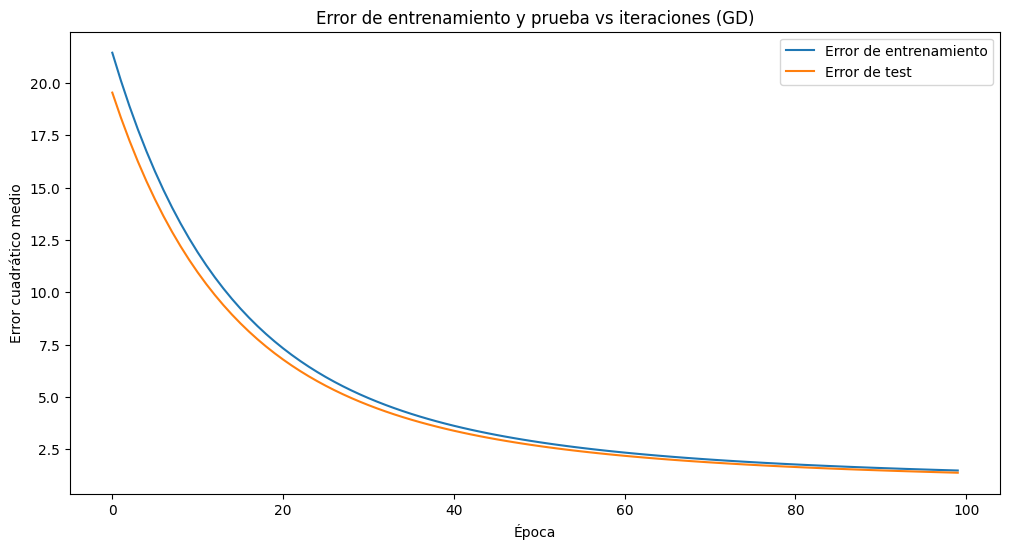

array([[-1.30584346e-01],
       [ 2.37805348e-01],
       [-2.55028687e-01],
       [-1.11161827e-01],
       [ 8.73055939e-01],
       [ 3.11635339e-02],
       [ 5.18204187e-01],
       [-6.61355317e-01],
       [-8.46861283e-04],
       [ 4.12541245e-01],
       [ 7.01489212e-01],
       [-2.86078580e-01],
       [-1.32248401e-01],
       [ 6.64922089e-02],
       [-1.34841743e-01],
       [ 4.30096950e-02],
       [-2.63500523e-01],
       [-2.21369170e-01],
       [-3.68420180e-01],
       [ 1.94480793e-01],
       [ 2.05109673e-01]])

In [90]:
gradient_descent(X_train, y_train_gd, X_test, y_test_gd, lr=0.01, epochs=100)

In [91]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):

    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = error ** 2
            train_errors.append(train_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return W

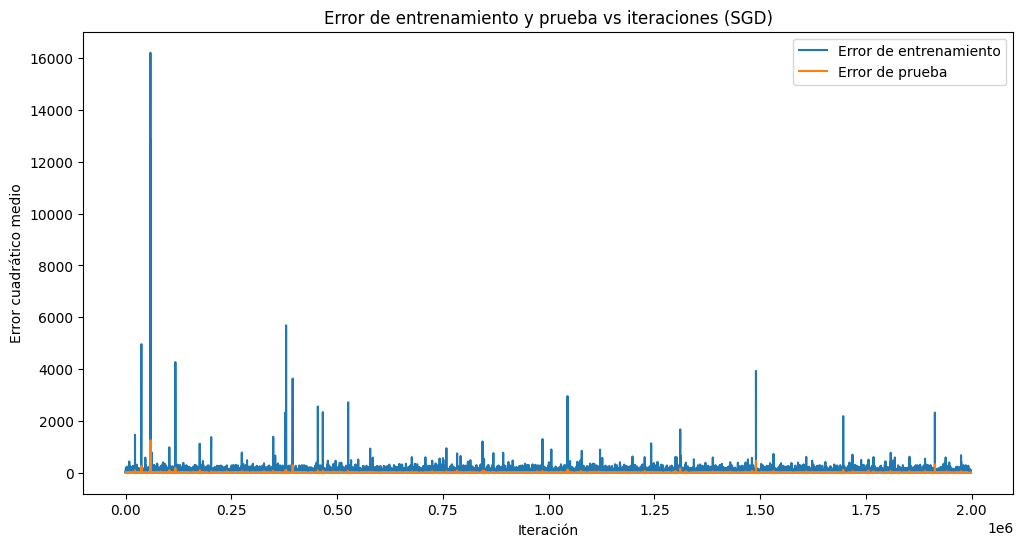

array([[-0.11502254],
       [-0.03582366],
       [-0.0997279 ],
       [-0.04524797],
       [-0.03338713],
       [ 0.14662102],
       [-0.31367948],
       [-0.12350819],
       [-0.07644479],
       [ 0.07517169],
       [ 0.05909043],
       [-0.00116952],
       [-0.06737667],
       [ 0.11978288],
       [-0.15775158],
       [ 0.00791327],
       [-0.01664343],
       [ 0.0339578 ],
       [ 0.10193956],
       [ 0.06571997],
       [ 0.16811535]])

In [92]:
stochastic_gradient_descent(X_train, y_train_gd, X_test, y_test_gd, lr=0.01, epochs=100)

In [93]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

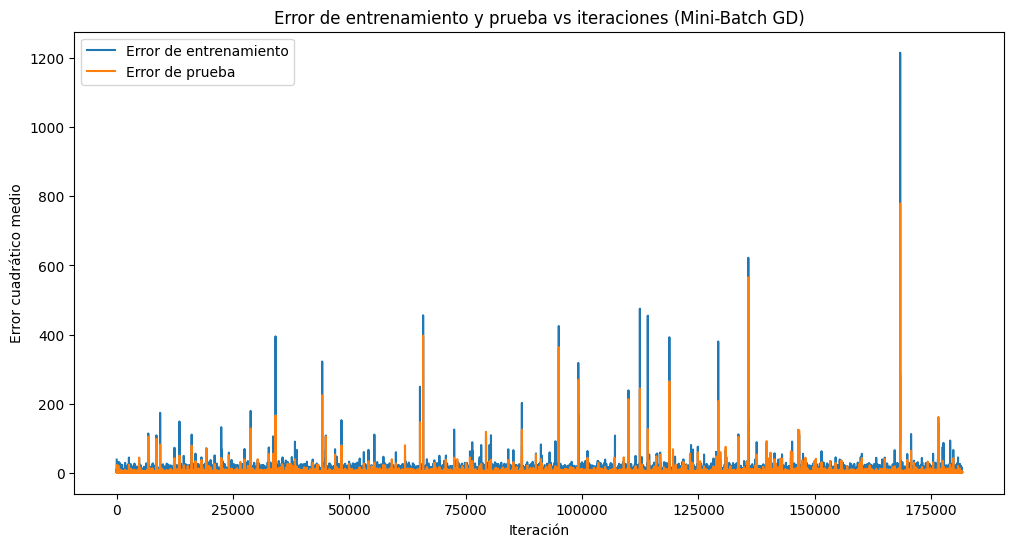

array([[-0.01272979],
       [ 0.06349953],
       [ 0.17100311],
       [ 0.0679941 ],
       [ 0.03922826],
       [-0.27103027],
       [-0.27443076],
       [-0.10834882],
       [-0.08552618],
       [ 0.24935064],
       [ 0.17745721],
       [ 0.0117094 ],
       [ 0.08068038],
       [-0.21679821],
       [-0.03526036],
       [-0.00718636],
       [ 0.00551796],
       [-0.19323078],
       [-0.07628316],
       [ 0.09840092],
       [ 0.1434922 ]])

In [94]:
mini_batch_gradient_descent(X_train, y_train_gd, X_test, y_test_gd, lr=0.1, epochs=100, batch_size=11)

# Ejercicio 5

### Estandarizacion de datos

In [95]:
df_train

,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,RainTomorrow,RainfallTomorrow,WindSpeed_Difference,Humidity_Difference,Cloud_Difference,...,Dif_Temp_Max_Min,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W
6047,0.0,12.0,12.3,48.0,0,0,0.0,-42.0,7.0,-3.0,...,17.3,0,1,0,0,0,0,0,0,1
6048,0.0,14.8,13.0,37.0,0,0,0.0,-18.0,22.0,0.0,...,10.5,0,1,0,0,1,0,0,1,0
6049,0.0,12.6,13.3,30.0,0,0,0.0,-15.0,64.0,5.0,...,18.6,0,0,0,1,0,0,1,0,0
6050,0.0,10.8,10.6,46.0,0,0,0.0,-16.0,20.0,-5.0,...,18.2,1,0,0,1,0,0,1,0,0
6051,0.0,11.4,12.2,31.0,0,0,0.0,-25.0,15.0,-4.0,...,16.5,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101974,0.0,4.6,11.2,39.0,0,0,0.0,-24.0,11.0,-1.0,...,15.9,0,1,0,0,1,0,0,1,0
101975,0.0,5.6,13.6,44.0,0,0,0.0,-27.0,14.0,1.0,...,18.3,0,1,0,0,0,0,0,1,0
101976,0.0,6.6,13.6,41.0,0,0,0.0,-26.0,26.0,0.0,...,23.1,0,0,1,0,0,0,0,1,0
101977,0.0,4.8,13.6,50.0,0,0,0.0,-28.0,18.0,0.0,...,29.1,0,0,1,1,0,0,0,0,1


In [96]:
df_test.columns.drop("RainTomorrow")

Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'RainToday',
       'RainfallTomorrow', 'WindSpeed_Difference', 'Humidity_Difference',
       'Cloud_Difference', 'Pressure_Difference', 'Temp_Difference',
       'Dif_Temp_Max_Min', 'WindGustDir_N', 'WindGustDir_S', 'WindGustDir_W',
       'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W', 'WindDir3pm_N',
       'WindDir3pm_S', 'WindDir3pm_W'],
      dtype='object')

In [97]:
df_train

,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,RainTomorrow,RainfallTomorrow,WindSpeed_Difference,Humidity_Difference,Cloud_Difference,...,Dif_Temp_Max_Min,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W
6047,0.0,12.0,12.3,48.0,0,0,0.0,-42.0,7.0,-3.0,...,17.3,0,1,0,0,0,0,0,0,1
6048,0.0,14.8,13.0,37.0,0,0,0.0,-18.0,22.0,0.0,...,10.5,0,1,0,0,1,0,0,1,0
6049,0.0,12.6,13.3,30.0,0,0,0.0,-15.0,64.0,5.0,...,18.6,0,0,0,1,0,0,1,0,0
6050,0.0,10.8,10.6,46.0,0,0,0.0,-16.0,20.0,-5.0,...,18.2,1,0,0,1,0,0,1,0,0
6051,0.0,11.4,12.2,31.0,0,0,0.0,-25.0,15.0,-4.0,...,16.5,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101974,0.0,4.6,11.2,39.0,0,0,0.0,-24.0,11.0,-1.0,...,15.9,0,1,0,0,1,0,0,1,0
101975,0.0,5.6,13.6,44.0,0,0,0.0,-27.0,14.0,1.0,...,18.3,0,1,0,0,0,0,0,1,0
101976,0.0,6.6,13.6,41.0,0,0,0.0,-26.0,26.0,0.0,...,23.1,0,0,1,0,0,0,0,1,0
101977,0.0,4.8,13.6,50.0,0,0,0.0,-28.0,18.0,0.0,...,29.1,0,0,1,1,0,0,0,0,1


In [98]:
# Instanciar el objeto StandardScaler
scaler = StandardScaler()

# Obtener las columnas de df_train excluyendo 'RainTomorrow'
columnas_entrenamiento = df_train.columns[df_train.columns != 'RainTomorrow']

# Aplicar la transformación de escala a las columnas de entrenamiento
datos_escala = scaler.fit_transform(df_train[columnas_entrenamiento])

# Crear un DataFrame con los datos escalados y las etiquetas de columna correctas
df_train_estandarizado = pd.DataFrame(datos_escala, columns=columnas_entrenamiento)

# Agregar la columna 'RainTomorrow' al DataFrame estandarizado
df_train_estandarizado['RainTomorrow'] = df_train['RainTomorrow'].values


# Obtener las columnas de df_train excluyendo 'RainTomorrow'
columnas_entrenamiento_test = df_test.columns[df_test.columns != 'RainTomorrow']

# Aplicar la transformación de escala a las columnas de entrenamiento
datos_escala_test = scaler.fit_transform(df_test[columnas_entrenamiento_test])

# Crear un DataFrame con los datos escalados y las etiquetas de columna correctas
df_test_estandarizado = pd.DataFrame(datos_escala_test, columns=columnas_entrenamiento_test)

# Agregar la columna 'RainTomorrow' al DataFrame estandarizado
df_test_estandarizado['RainTomorrow'] = df_test['RainTomorrow'].values


In [99]:
df_train_estandarizado

,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,RainfallTomorrow,WindSpeed_Difference,Humidity_Difference,Cloud_Difference,Pressure_Difference,...,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,RainTomorrow
0,-0.318702,2.204626,1.557680,0.388790,-0.555286,-0.319907,-1.375915,-0.749031,-1.252869,-0.109031,...,-0.595520,1.751985,-0.671213,-0.659861,-0.450339,-0.718978,-0.475135,-0.604931,1.486713,0
1,-0.318702,3.044352,1.756990,-0.403553,-0.555286,-0.319907,0.789220,0.198885,0.037211,-0.628153,...,-0.595520,1.751985,-0.671213,-0.659861,2.220549,-0.718978,-0.475135,1.653080,-0.672625,0
2,-0.318702,2.384568,1.842408,-0.907771,-0.555286,-0.319907,1.059862,2.853048,2.187345,2.571289,...,-0.595520,-0.570781,-0.671213,1.515470,-0.450339,-0.718978,2.104666,-0.604931,-0.672625,0
3,-0.318702,1.844744,1.073642,0.244728,-0.555286,-0.319907,0.969648,0.072496,-2.112922,0.457283,...,1.679205,-0.570781,-0.671213,1.515470,-0.450339,-0.718978,2.104666,-0.604931,-0.672625,0
4,-0.318702,2.024685,1.529207,-0.835740,-0.555286,-0.319907,0.157722,-0.243476,-1.682896,0.693247,...,-0.595520,-0.570781,1.489841,-0.659861,-0.450339,1.390862,-0.475135,-0.604931,1.486713,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19976,-0.318702,-0.014649,1.244479,-0.259490,-0.555286,-0.319907,0.247936,-0.496253,-0.392816,-1.241660,...,-0.595520,1.751985,-0.671213,-0.659861,2.220549,-0.718978,-0.475135,1.653080,-0.672625,0
19977,-0.318702,0.285253,1.927827,0.100666,-0.555286,-0.319907,-0.022706,-0.306670,0.467238,0.174126,...,-0.595520,1.751985,-0.671213,-0.659861,-0.450339,-0.718978,-0.475135,1.653080,-0.672625,0
19978,-0.318702,0.585155,1.927827,-0.115428,-0.555286,-0.319907,0.067508,0.451662,0.037211,0.646055,...,-0.595520,-0.570781,1.489841,-0.659861,-0.450339,-0.718978,-0.475135,1.653080,-0.672625,0
19979,-0.318702,0.045331,1.927827,0.532853,-0.555286,-0.319907,-0.112920,-0.053893,0.037211,0.598862,...,-0.595520,-0.570781,1.489841,1.515470,-0.450339,-0.718978,-0.475135,-0.604931,1.486713,0


In [100]:
df_test_estandarizado

,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,RainfallTomorrow,WindSpeed_Difference,Humidity_Difference,Cloud_Difference,Pressure_Difference,...,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,RainTomorrow
0,-0.323429,0.590270,-0.201292,-0.731128,-0.568456,-0.321516,1.362443,-0.535970,2.329025,0.608539,...,-0.555287,1.652584,-0.675106,-0.670034,-0.45451,-0.694766,-0.486749,1.598839,-0.654870,0
1,-0.323429,5.084845,0.000519,1.450110,-0.568456,-0.321516,-1.426807,-0.791307,-0.139652,0.144870,...,-0.555287,-0.605113,1.481248,-0.670034,-0.45451,1.439334,-0.486749,-0.625454,1.527021,0
2,-0.323429,0.309359,0.045997,0.359491,-0.568456,-0.321516,0.012806,-0.472135,-0.551098,-1.014305,...,-0.555287,-0.605113,-0.675106,1.492462,-0.45451,-0.694766,-0.486749,-0.625454,-0.654870,0
3,-0.323429,1.320638,0.104851,-0.294880,-0.568456,-0.321516,0.732613,-0.408301,-2.608330,-0.040598,...,-0.555287,-0.605113,-0.675106,-0.670034,-0.45451,-0.694766,-0.486749,1.598839,-0.654870,0
4,-0.323429,0.028448,-0.130319,0.359491,-0.568456,-0.321516,-0.976928,0.038540,-0.962545,0.608539,...,-0.555287,1.652584,-0.675106,-0.670034,-0.45451,-0.694766,-0.486749,1.598839,-0.654870,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4323,-0.323429,-0.870467,0.217454,-0.004049,-0.568456,-0.037868,0.822588,0.038540,-0.139652,0.052136,...,1.800871,-0.605113,-0.675106,1.492462,-0.45451,-0.694766,-0.486749,-0.625454,1.527021,1
4324,-0.039816,-0.870467,-0.285078,-1.530916,1.759150,-0.321516,0.552661,-0.152964,-0.551098,-0.550635,...,-0.555287,1.652584,-0.675106,1.492462,-0.45451,-0.694766,-0.486749,-0.625454,-0.654870,0
4325,-0.323429,-0.870467,-0.313769,-0.731128,-0.568456,-0.321516,0.732613,0.421546,0.683240,1.164943,...,1.800871,-0.605113,-0.675106,1.492462,-0.45451,-0.694766,2.054446,-0.625454,-0.654870,0
4326,-0.323429,-0.870467,0.027048,-0.294880,-0.568456,-0.009503,1.182492,0.102374,1.506133,0.237604,...,1.800871,-0.605113,-0.675106,1.492462,-0.45451,-0.694766,-0.486749,-0.625454,1.527021,1


### Regularizacion de datos

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
# X, y TRAIN
x_train_lg = df_train_estandarizado[
    [
        "Rainfall",
        "Evaporation",
        "Sunshine",
        "WindGustSpeed",
        "RainToday",
        "WindSpeed_Difference",
        "Humidity_Difference",
        "Cloud_Difference",
        "Pressure_Difference",
        "Temp_Difference",
        "Dif_Temp_Max_Min",
        "WindGustDir_N",
        "WindGustDir_S",
        "WindGustDir_W",
        "WindDir9am_N",
        "WindDir9am_S",
        "WindDir9am_W",
        "WindDir3pm_N",
        "WindDir3pm_S",
        "WindDir3pm_W",
    ]
]
y_train_lg = df_train_estandarizado["RainTomorrow"]

# X, y TEST

x_test_lg = df_test_estandarizado[
    [
        "Rainfall",
        "Evaporation",
        "Sunshine",
        "WindGustSpeed",
        "RainToday",
        "WindSpeed_Difference",
        "Humidity_Difference",
        "Cloud_Difference",
        "Pressure_Difference",
        "Temp_Difference",
        "Dif_Temp_Max_Min",
        "WindGustDir_N",
        "WindGustDir_S",
        "WindGustDir_W",
        "WindDir9am_N",
        "WindDir9am_S",
        "WindDir9am_W",
        "WindDir3pm_N",
        "WindDir3pm_S",
        "WindDir3pm_W",
    ]
]
y_test_lg = df_test_estandarizado["RainTomorrow"]

In [103]:
# Se define el modelo de Regresión Logística
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg_2D = LogisticRegression()

In [104]:
# Entrenar un modelo de regresión logística
logreg.fit(x_train_lg, y_train_lg)

# Realizar predicciones en el conjunto de prueba
y_pred = logreg.predict(x_test_lg)

In [105]:
logreg

LogisticRegression(class_weight='balanced', random_state=42)

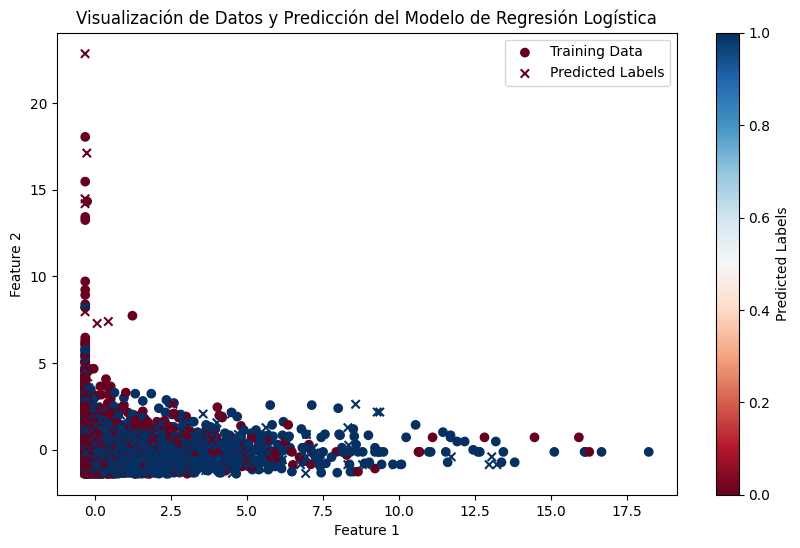

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizar los datos y la predicción del modelo
plt.figure(figsize=(10, 6))

# Plot de los puntos de entrenamiento
plt.scatter(x_train_lg.iloc[:, 0], x_train_lg.iloc[:, 1], c=y_train_lg, cmap=plt.cm.RdBu, marker='o', label='Training Data')

# Plot de los puntos de prueba con su predicción
plt.scatter(x_test_lg.iloc[:, 0], x_test_lg.iloc[:, 1], c=y_pred, cmap=plt.cm.RdBu, marker='x', label='Predicted Labels')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualización de Datos y Predicción del Modelo de Regresión Logística')
plt.legend()
plt.colorbar(label='Predicted Labels')
plt.show()

### Metricas

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calcular métricas
accuracy_logreg = accuracy_score(y_test_lg, y_pred)
# accuracy_logreg_2D = accuracy_score(y_test_2D, y_pred_2D)

confusion_matrix_logreg = confusion_matrix(y_test_lg, y_pred)
# confusion_matrix_logreg_2D = confusion_matrix(y_test_2D, y_pred_2D)

classification_report_logreg = classification_report(y_test_lg, y_pred)
# classification_report_logreg_2D = classification_report(y_test_2D, y_pred_2D)

# Imprimir métricas
print("Métricas para logreg:")
print(f'Precisión: {accuracy_logreg}')
print("Matriz de confusión:")
print(confusion_matrix_logreg)
print("Reporte de clasificación:")
print(classification_report_logreg)

# print("\nMétricas para logreg_2D:")
# print(f'Precisión: {accuracy_logreg_2D}')
# print("Matriz de confusión:")
# print(confusion_matrix_logreg_2D)
# print("Reporte de clasificación:")
# print(classification_report_logreg_2D)

Métricas para logreg:
Precisión: 0.76409426987061
Matriz de confusión:
[[2549  722]
 [ 299  758]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      3271
           1       0.51      0.72      0.60      1057

    accuracy                           0.76      4328
   macro avg       0.70      0.75      0.72      4328
weighted avg       0.80      0.76      0.78      4328



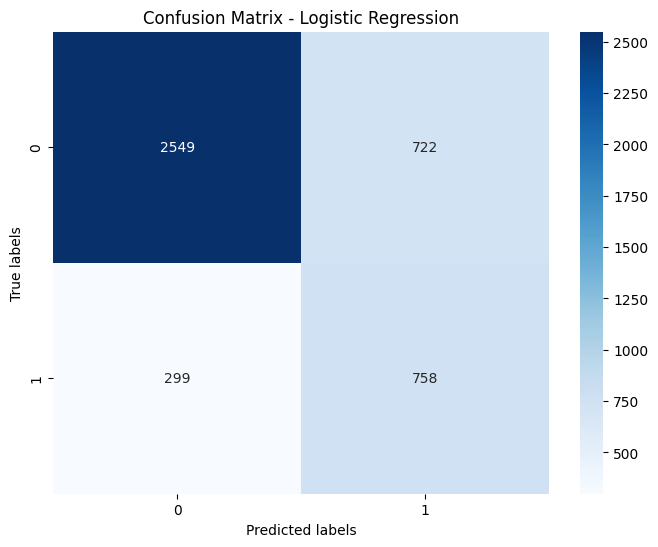

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Supongamos que ya tienes y_test_lg e y_pred

# Calcula la matriz de confusión
confusion_matrix_logreg = confusion_matrix(y_test_lg, y_pred)

# Define las etiquetas de las clases
labels = np.unique(y_test_lg)

# Grafica la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [109]:
# Obtengo las probabilidades de predicción del modelo
y_probs = logreg.predict_proba(x_test_lg)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test_lg, y_probs)
roc_auc = auc(fpr, tpr)

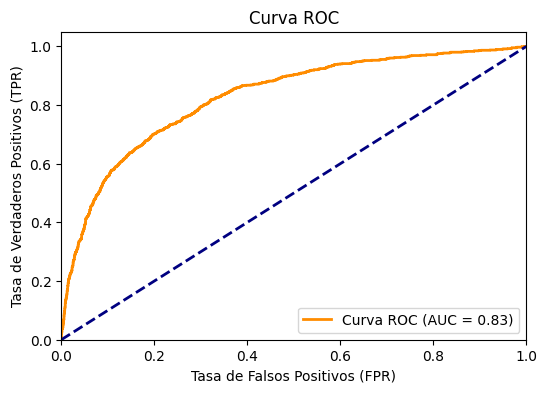

In [110]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [111]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import RandomForestClassifier

In [112]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(x_train_lg, y_train_lg)

In [113]:
len(y_resampled[y_resampled==1]), len(y_resampled[y_resampled==0])

(15242, 15242)

In [114]:
logreg.fit(X_resampled, y_resampled)
y_pred = logreg.predict(x_test_lg)

print("Resultados regresión logística con Oversampling:\n")
print(classification_report(y_test_lg, y_pred))
print(confusion_matrix(y_test_lg, y_pred))

Resultados regresión logística con Oversampling:

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      3271
           1       0.52      0.72      0.60      1057

    accuracy                           0.77      4328
   macro avg       0.71      0.75      0.72      4328
weighted avg       0.80      0.77      0.78      4328

[[2559  712]
 [ 298  759]]


In [115]:
# Obtengo las probabilidades de predicción del modelo
y_probs = logreg.predict_proba(x_test_lg)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test_lg, y_probs)
roc_auc = auc(fpr, tpr)

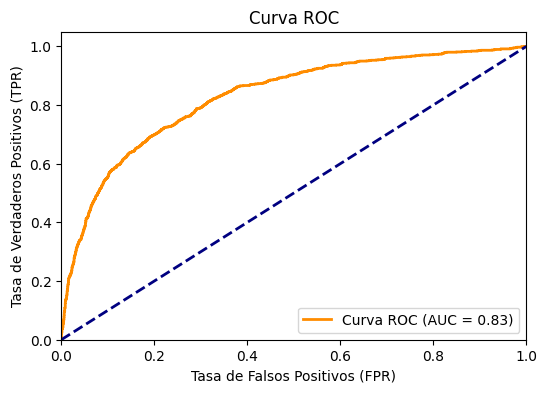

In [116]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Ejercicio 6

### Modelo Base de Regresion

#### Regresion Lineal

In [117]:
df_train

,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,RainTomorrow,RainfallTomorrow,WindSpeed_Difference,Humidity_Difference,Cloud_Difference,...,Dif_Temp_Max_Min,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W
6047,0.0,12.0,12.3,48.0,0,0,0.0,-42.0,7.0,-3.0,...,17.3,0,1,0,0,0,0,0,0,1
6048,0.0,14.8,13.0,37.0,0,0,0.0,-18.0,22.0,0.0,...,10.5,0,1,0,0,1,0,0,1,0
6049,0.0,12.6,13.3,30.0,0,0,0.0,-15.0,64.0,5.0,...,18.6,0,0,0,1,0,0,1,0,0
6050,0.0,10.8,10.6,46.0,0,0,0.0,-16.0,20.0,-5.0,...,18.2,1,0,0,1,0,0,1,0,0
6051,0.0,11.4,12.2,31.0,0,0,0.0,-25.0,15.0,-4.0,...,16.5,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101974,0.0,4.6,11.2,39.0,0,0,0.0,-24.0,11.0,-1.0,...,15.9,0,1,0,0,1,0,0,1,0
101975,0.0,5.6,13.6,44.0,0,0,0.0,-27.0,14.0,1.0,...,18.3,0,1,0,0,0,0,0,1,0
101976,0.0,6.6,13.6,41.0,0,0,0.0,-26.0,26.0,0.0,...,23.1,0,0,1,0,0,0,0,1,0
101977,0.0,4.8,13.6,50.0,0,0,0.0,-28.0,18.0,0.0,...,29.1,0,0,1,1,0,0,0,0,1


In [118]:
X_train

,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,WindSpeed_Difference,Humidity_Difference,Cloud_Difference,Pressure_Difference,Temp_Difference,Dif_Temp_Max_Min,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W
0,-0.318702,2.204626,1.557680,0.388790,-0.555286,-1.375915,-0.749031,-1.252869,-0.109031,0.518277,1.340022,-0.595520,1.751985,-0.671213,-0.659861,-0.450339,-0.718978,-0.475135,-0.604931,1.486713
1,-0.318702,3.044352,1.756990,-0.403553,-0.555286,0.789220,0.198885,0.037211,-0.628153,0.489753,-0.045240,-0.595520,1.751985,-0.671213,-0.659861,2.220549,-0.718978,-0.475135,1.653080,-0.672625
2,-0.318702,2.384568,1.842408,-0.907771,-0.555286,1.059862,2.853048,2.187345,2.571289,3.798504,1.604851,-0.595520,-0.570781,-0.671213,1.515470,-0.450339,-0.718978,2.104666,-0.604931,-0.672625
3,-0.318702,1.844744,1.073642,0.244728,-0.555286,0.969648,0.072496,-2.112922,0.457283,0.347135,1.523365,1.679205,-0.570781,-0.671213,1.515470,-0.450339,-0.718978,2.104666,-0.604931,-0.672625
4,-0.318702,2.024685,1.529207,-0.835740,-0.555286,0.157722,-0.243476,-1.682896,0.693247,0.432706,1.177050,-0.595520,-0.570781,1.489841,-0.659861,-0.450339,1.390862,-0.475135,-0.604931,1.486713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19976,-0.318702,-0.014649,1.244479,-0.259490,-0.555286,0.247936,-0.496253,-0.392816,-1.241660,-0.594148,1.054821,-0.595520,1.751985,-0.671213,-0.659861,2.220549,-0.718978,-0.475135,1.653080,-0.672625
19977,-0.318702,0.285253,1.927827,0.100666,-0.555286,-0.022706,-0.306670,0.467238,0.174126,0.375658,1.543736,-0.595520,1.751985,-0.671213,-0.659861,-0.450339,-0.718978,-0.475135,1.653080,-0.672625
19978,-0.318702,0.585155,1.927827,-0.115428,-0.555286,0.067508,0.451662,0.037211,0.646055,1.545131,2.521568,-0.595520,-0.570781,1.489841,-0.659861,-0.450339,-0.718978,-0.475135,1.653080,-0.672625
19979,-0.318702,0.045331,1.927827,0.532853,-0.555286,-0.112920,-0.053893,0.037211,0.598862,1.373988,3.743858,-0.595520,-0.570781,1.489841,1.515470,-0.450339,-0.718978,-0.475135,-0.604931,1.486713


In [119]:
X_train[["Rainfall", "RainToday"]]

,Rainfall,RainToday
0,-0.318702,-0.555286
1,-0.318702,-0.555286
2,-0.318702,-0.555286
3,-0.318702,-0.555286
4,-0.318702,-0.555286
...,...,...
19976,-0.318702,-0.555286
19977,-0.318702,-0.555286
19978,-0.318702,-0.555286
19979,-0.318702,-0.555286


In [120]:
X_train_rl = X_train[["Rainfall", "RainToday"]]
X_test_rl = X_test[["Rainfall", "RainToday"]]

In [121]:
X_train_rl

,Rainfall,RainToday
0,-0.318702,-0.555286
1,-0.318702,-0.555286
2,-0.318702,-0.555286
3,-0.318702,-0.555286
4,-0.318702,-0.555286
...,...,...
19976,-0.318702,-0.555286
19977,-0.318702,-0.555286
19978,-0.318702,-0.555286
19979,-0.318702,-0.555286


In [122]:
X_test_rl

,Rainfall,RainToday
0,-0.323429,-0.568456
1,-0.323429,-0.568456
2,-0.323429,-0.568456
3,-0.323429,-0.568456
4,-0.323429,-0.568456
...,...,...
4323,-0.323429,-0.568456
4324,-0.039816,1.759150
4325,-0.323429,-0.568456
4326,-0.323429,-0.568456


In [123]:
model_rl = LinearRegression()

model_rl.fit(X_train_rl, y_train)

y_pred = model_rl.predict(X_test_rl)

coefficients = model_rl.coef_
intercept = model_rl.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# MSE: Error Cuadratico Medio
mse = mean_squared_error(y_test, y_pred)
# R^2
r2 = r2_score(y_test, y_pred)
# MAE: Error Absoluto Medio
mae = mean_absolute_error(y_test, y_pred)
# RMSE: Raíz del Error Cuadrático Medio
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nR^2: {r2}\n")
print(f"MSE(Error Cuadratico Medio): {mse}\n")
print(f"MAE(Error Absoluto Medio): {mae}\n")
print(f"RMSE(Raíz del Error Cuadrático Medio): {rmse}\n")

Coefficients: [0.20412472 0.0991735 ]
Intercept: 2.8580622327598343e-17

R^2: 0.08842134639598054

MSE(Error Cuadratico Medio): 0.9115786536040195

MAE(Error Absoluto Medio): 0.4454345377721649

RMSE(Raíz del Error Cuadrático Medio): 0.9547662821884838



### Modelo Base de Clasificacion

#### Clasificador Aleatorio

In [124]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [125]:
dummy_random = DummyClassifier(strategy='uniform')
dummy_random.fit(x_train_lg, y_train_lg)
y_pred_random = dummy_random.predict(x_test_lg)

accuracy_random = accuracy_score(y_test_lg, y_pred_random)
print("Accuracy del clasificador aleatorio:", accuracy_random)


Accuracy del clasificador aleatorio: 0.5069316081330869


# Ejercicio 7

### Validacion Cruzada K-Folds

In [126]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, LeaveOneOut
from sklearn.ensemble import RandomForestClassifier

In [127]:
clf = RandomForestClassifier(n_estimators=50, random_state=42)

In [128]:
X_train_k, x_val_k, y_train_k, y_val_k = train_test_split(x_train_lg, y_train_lg, test_size=0.2, random_state=42)

In [129]:
X_train_k

,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,WindSpeed_Difference,Humidity_Difference,Cloud_Difference,Pressure_Difference,Temp_Difference,Dif_Temp_Max_Min,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W
16590,2.508688,-1.094297,-0.919456,-0.403553,1.800875,0.428364,0.072496,0.037211,-0.864117,0.004850,-0.656385,1.679205,-0.570781,-0.671213,1.515470,-0.450339,-0.718978,2.104666,-0.604931,-0.672625
19927,-0.287632,-0.194590,1.443789,-0.907771,-0.555286,1.240290,1.273189,0.897265,0.126933,2.486413,2.908627,1.679205,-0.570781,-0.671213,-0.659861,-0.450339,-0.718978,-0.475135,-0.604931,1.486713
9658,-0.318702,-0.974336,-0.036746,-1.844177,-0.555286,0.879434,1.209994,2.617372,0.787633,0.803514,1.075192,-0.595520,-0.570781,1.489841,1.515470,-0.450339,-0.718978,-0.475135,-0.604931,1.486713
8132,-0.318702,0.585155,1.728517,0.028634,-0.555286,0.067508,-0.369865,0.037211,-0.675346,0.518277,0.382561,-0.595520,1.751985,-0.671213,-0.659861,2.220549,-0.718978,2.104666,-0.604931,-0.672625
16024,-0.287632,-0.974336,1.358370,-1.339958,-0.555286,1.059862,-0.053893,0.037211,0.693247,0.946133,0.993706,-0.595520,-0.570781,1.489841,-0.659861,-0.450339,-0.718978,-0.475135,1.653080,-0.672625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.318702,-0.914355,0.361821,-0.835740,-0.555286,0.789220,0.009302,0.037211,-0.392189,-0.508577,-0.350813,-0.595520,1.751985,-0.671213,-0.659861,-0.450339,1.390862,-0.475135,1.653080,-0.672625
11964,-0.318702,0.225273,-0.236108,0.820978,-0.555286,-0.293348,-1.254586,-0.392816,-0.250610,-0.365958,-0.717500,-0.595520,-0.570781,1.489841,-0.659861,-0.450339,1.390862,-0.475135,-0.604931,1.486713
5390,-0.318702,0.465194,0.532658,1.325196,-0.555286,-1.917199,-0.053893,-0.822842,0.362897,0.147469,0.097360,-0.595520,-0.570781,1.489841,-0.659861,-0.450339,1.390862,-0.475135,-0.604931,1.486713
860,-0.318702,-0.794395,0.052896,-0.691678,-0.555286,0.247936,1.083606,-0.392816,-0.109031,0.889085,0.952963,-0.595520,-0.570781,-0.671213,-0.659861,-0.450339,-0.718978,-0.475135,-0.604931,-0.672625


In [130]:
x_val_k

,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,WindSpeed_Difference,Humidity_Difference,Cloud_Difference,Pressure_Difference,Temp_Difference,Dif_Temp_Max_Min,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W
4013,1.421231,-1.334218,0.361821,-0.547615,1.800875,0.428364,0.957217,0.037211,0.787633,-0.166292,-0.595271,-0.595520,-0.570781,1.489841,-0.659861,-0.450339,1.390862,-0.475135,-0.604931,1.486713
2085,-0.318702,1.604822,0.012602,-1.051834,-0.555286,1.601145,0.009302,0.037211,0.457283,0.860562,1.360393,-0.595520,-0.570781,-0.671213,-0.659861,-0.450339,-0.718978,-0.475135,1.653080,-0.672625
4772,0.147351,-1.094297,0.760441,-0.403553,1.800875,0.879434,-0.433059,0.037211,0.834826,0.204516,-0.330441,-0.595520,-0.570781,1.489841,-0.659861,-0.450339,1.390862,-0.475135,-0.604931,-0.672625
9109,-0.318702,-0.554473,0.219457,-0.835740,-0.555286,1.330503,-0.559448,-0.392816,1.259562,-0.280387,1.401136,-0.595520,-0.570781,-0.671213,-0.659861,-0.450339,-0.718978,-0.475135,-0.604931,-0.672625
19298,-0.318702,0.885057,0.646549,0.676915,-0.555286,-1.646557,0.957217,0.467238,0.646055,0.946133,1.604851,-0.595520,-0.570781,1.489841,-0.659861,-0.450339,-0.718978,-0.475135,-0.604931,1.486713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,-0.194421,-1.214258,-1.659750,-1.844177,-0.555286,1.420717,-0.243476,0.037211,-0.722539,-0.651195,-1.206415,-0.595520,-0.570781,1.489841,-0.659861,-0.450339,1.390862,-0.475135,1.653080,-0.672625
10662,0.085211,1.604822,-0.691674,1.469258,1.800875,-1.917199,-0.938614,-2.542949,-0.911310,-0.765290,-0.717500,-0.595520,-0.570781,1.489841,-0.659861,-0.450339,1.390862,-0.475135,-0.604931,1.486713
841,3.192233,-0.434512,0.024259,0.100666,1.800875,-0.383562,0.767634,0.897265,-0.061838,-0.280387,-0.595271,-0.595520,-0.570781,1.489841,-0.659861,-0.450339,1.390862,-0.475135,-0.604931,1.486713
11946,-0.318702,-1.094297,-0.890984,-1.051834,-0.555286,0.879434,1.209994,0.037211,0.174126,0.090421,0.036246,-0.595520,1.751985,-0.671213,-0.659861,-0.450339,1.390862,-0.475135,1.653080,-0.672625


In [131]:
y_train_k

16590    0
19927    0
9658     0
8132     0
16024    0
        ..
11284    0
11964    1
5390     0
860      0
15795    1
Name: RainTomorrow, Length: 15984, dtype: int64

In [132]:
y_val_k

4013     0
2085     0
4772     0
9109     0
19298    0
        ..
15545    0
10662    0
841      1
11946    0
7751     1
Name: RainTomorrow, Length: 3997, dtype: int64

In [133]:
cv_strategies = [
    ("KFold", KFold(n_splits=5, shuffle=True, random_state=42))
]

results = {}
for name, cv in cv_strategies:
    scores = cross_val_score(clf, x_val_k, y_val_k, cv=cv)
    results[name] = scores

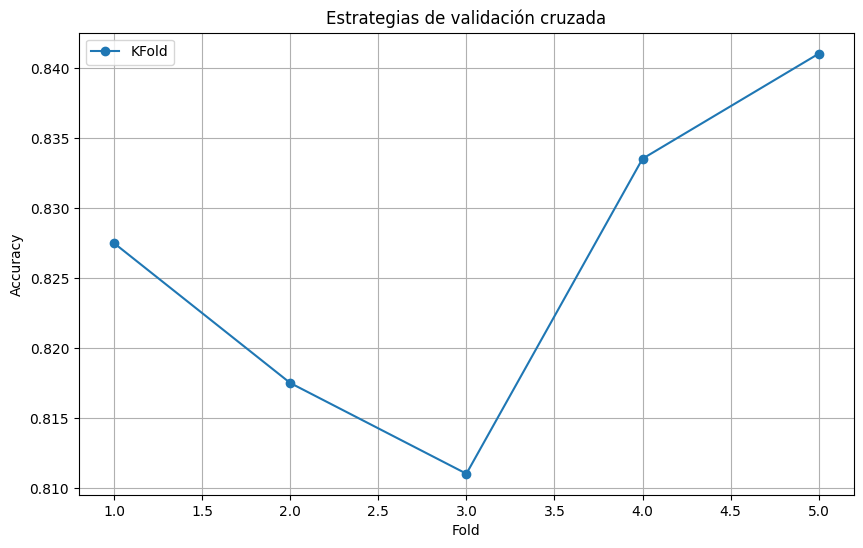

In [134]:
plt.figure(figsize=(10, 6))
for name, scores in results.items():
    plt.plot(range(1, len(scores) + 1), scores, marker='o', label=name)

plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Estrategias de validación cruzada")
plt.legend()
plt.grid(True)
plt.show()

In [135]:
results['KFold']

array([0.8275    , 0.8175    , 0.81101377, 0.83354193, 0.84105131])

In [136]:
for strategy in cv_strategies:
  print('Media para la estrategia', strategy[0],':',results['KFold'].mean())
  print('Desvío estándar para la estrategia', strategy[0],':',results['KFold'].std())

Media para la estrategia KFold : 0.8261214017521903
Desvío estándar para la estrategia KFold : 0.01079292553302106


### Grid y Random Search

In [163]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# grid search

grid_params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'class_weight': ['balanced', None],
    'dual': [True, False],
    'C': [0, 1],
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), grid_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train_lg, y_train_lg)
best_grid_params = grid_search.best_params_
best_grid_model = LogisticRegression(**best_grid_params, random_state=42)
best_grid_model.fit(x_train_lg, y_train_lg)
grid_search_mse = mean_squared_error(y_test_lg, best_grid_model.predict(x_test_lg))

In [ ]:
# random search
random_params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'class_weight': ['balanced', None],
    'dual': [True, False],
    'C': [0, 1],
    'fit_intercept': [True, False]
}

random_search = RandomizedSearchCV(LogisticRegression(random_state=42), random_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(x_train_lg, y_train_lg)
best_random_params = grid_search.best_params_
best_random_model = LogisticRegression(**best_grid_params, random_state=42)
best_random_model.fit(x_train_lg, y_train_lg)
random_search_mse = mean_squared_error(y_test_lg, best_random_model.predict(x_test_lg))

# random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), random_params, n_iter=4, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# random_search.fit(X_train, y_train)
# best_random_params = random_search.best_params_
# best_random_model = LogisticRegression(**best_random_params, random_state=42)
# best_random_model.fit(X_train, y_train)
# random_search_mse = mean_squared_error(y_test, best_random_model.predict(X_test))

In [171]:
best_random_params

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'penalty': 'l2'}

In [172]:
best_grid_params

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'penalty': 'l2'}

In [173]:
print("Grid Search MSE:", grid_search_mse)
print("Random Search MSE:", random_search_mse)

Grid Search MSE: 0.18299445471349354
Random Search MSE: 0.18299445471349354


In [175]:
log_reg_aj_grid = LogisticRegression(C=1,class_weight=None, dual=False, fit_intercept=True, penalty='l2', random_state=42)
log_reg_aj_random = LogisticRegression(C=1,class_weight='balanced', dual=False, fit_intercept=True, penalty='l2', random_state=42)

In [179]:
# Entrenar un modelo de regresión logística
log_reg_aj_grid.fit(x_train_lg, y_train_lg)
log_reg_aj_random.fit(x_train_lg, y_train_lg)

# Realizar predicciones en el conjunto de prueba
y_pred_grid = log_reg_aj_grid.predict(x_test_lg)
y_pred_random = log_reg_aj_random.predict(x_test_lg)

In [180]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calcular métricas
accuracy_logreg = accuracy_score(y_test_lg, y_pred_grid)
# accuracy_logreg_2D = accuracy_score(y_test_2D, y_pred_2D)

confusion_matrix_logreg = confusion_matrix(y_test_lg, y_pred_grid)
# confusion_matrix_logreg_2D = confusion_matrix(y_test_2D, y_pred_2D)

classification_report_logreg = classification_report(y_test_lg, y_pred_grid)
# classification_report_logreg_2D = classification_report(y_test_2D, y_pred_2D)

# Imprimir métricas
print("Métricas para logreg:")
print(f'Precisión: {accuracy_logreg}')
print("Matriz de confusión:")
print(confusion_matrix_logreg)
print("Reporte de clasificación:")
print(classification_report_logreg)

Métricas para logreg:
Precisión: 0.8170055452865065
Matriz de confusión:
[[3088  183]
 [ 609  448]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3271
           1       0.71      0.42      0.53      1057

    accuracy                           0.82      4328
   macro avg       0.77      0.68      0.71      4328
weighted avg       0.80      0.82      0.80      4328



In [181]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calcular métricas
accuracy_logreg = accuracy_score(y_test_lg, y_pred_random)
# accuracy_logreg_2D = accuracy_score(y_test_2D, y_pred_2D)

confusion_matrix_logreg = confusion_matrix(y_test_lg, y_pred_random)
# confusion_matrix_logreg_2D = confusion_matrix(y_test_2D, y_pred_2D)

classification_report_logreg = classification_report(y_test_lg, y_pred_random)
# classification_report_logreg_2D = classification_report(y_test_2D, y_pred_2D)

# Imprimir métricas
print("Métricas para logreg:")
print(f'Precisión: {accuracy_logreg}')
print("Matriz de confusión:")
print(confusion_matrix_logreg)
print("Reporte de clasificación:")
print(classification_report_logreg)

Métricas para logreg:
Precisión: 0.76409426987061
Matriz de confusión:
[[2549  722]
 [ 299  758]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      3271
           1       0.51      0.72      0.60      1057

    accuracy                           0.76      4328
   macro avg       0.70      0.75      0.72      4328
weighted avg       0.80      0.76      0.78      4328



In [182]:
def print_dataframe(filtered_cv_results):
    ### print de los resultados de cross validation
    for mean_precision, std_precision, mean_recall, std_recall, params in zip(
        filtered_cv_results["mean_test_precision"],
        filtered_cv_results["std_test_precision"],
        filtered_cv_results["mean_test_recall"],
        filtered_cv_results["std_test_recall"],
        filtered_cv_results["params"],
    ):
        print(
            f"precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
            f" recall: {mean_recall:0.3f} (±{std_recall:0.03f}),"
            f" for {params}"
        )
    print()


def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold
    of 0.7, rank the remaining by recall and keep all models with one standard
    deviation of the best by recall. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    precision_threshold = 0.7

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[
        cv_results_["mean_test_precision"] > precision_threshold
    ]

    print(f"Models with a precision higher than {precision_threshold}:")
    print_dataframe(high_precision_cv_results)

    high_precision_cv_results = high_precision_cv_results[
        [
            "mean_score_time",
            "mean_test_recall",
            "std_test_recall",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_recall",
            "rank_test_precision",
            "params",
        ]
    ]

    # Select the most performant models in terms of recall
    # (within 1 sigma from the best)
    best_recall_std = high_precision_cv_results["mean_test_recall"].std()
    best_recall = high_precision_cv_results["mean_test_recall"].max()
    best_recall_threshold = best_recall - best_recall_std

    high_recall_cv_results = high_precision_cv_results[
        high_precision_cv_results["mean_test_recall"] > best_recall_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest recall model:"
    )
    print_dataframe(high_recall_cv_results)

    # From the best candidates, select the fastest model to predict
    fastest_top_recall_high_precision_index = high_recall_cv_results[
        "mean_score_time"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and recall.\n"
        "Its scoring time is:\n\n"
        f"{high_recall_cv_results.loc[fastest_top_recall_high_precision_index]}"
    )

    return fastest_top_recall_high_precision_index

In [189]:
tuned_parameters = {"class_weight": [None, 'balanced'], "C": [0.1, 1, 10,100], "solver": ['newton-cg'], "max_iter": [200, 500]}

scores = ["precision", "recall"]

In [ ]:
grid_search = GridSearchCV(
    LogisticRegression(), tuned_parameters, scoring=scores, refit=refit_strategy
)
grid_search.fit(x_train_lg, y_train_lg)

# SHAP

In [228]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns

In [229]:
df_train_estandarizado

,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,RainfallTomorrow,WindSpeed_Difference,Humidity_Difference,Cloud_Difference,Pressure_Difference,...,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,RainTomorrow
0,-0.318702,2.204626,1.557680,0.388790,-0.555286,-0.319907,-1.375915,-0.749031,-1.252869,-0.109031,...,-0.595520,1.751985,-0.671213,-0.659861,-0.450339,-0.718978,-0.475135,-0.604931,1.486713,0
1,-0.318702,3.044352,1.756990,-0.403553,-0.555286,-0.319907,0.789220,0.198885,0.037211,-0.628153,...,-0.595520,1.751985,-0.671213,-0.659861,2.220549,-0.718978,-0.475135,1.653080,-0.672625,0
2,-0.318702,2.384568,1.842408,-0.907771,-0.555286,-0.319907,1.059862,2.853048,2.187345,2.571289,...,-0.595520,-0.570781,-0.671213,1.515470,-0.450339,-0.718978,2.104666,-0.604931,-0.672625,0
3,-0.318702,1.844744,1.073642,0.244728,-0.555286,-0.319907,0.969648,0.072496,-2.112922,0.457283,...,1.679205,-0.570781,-0.671213,1.515470,-0.450339,-0.718978,2.104666,-0.604931,-0.672625,0
4,-0.318702,2.024685,1.529207,-0.835740,-0.555286,-0.319907,0.157722,-0.243476,-1.682896,0.693247,...,-0.595520,-0.570781,1.489841,-0.659861,-0.450339,1.390862,-0.475135,-0.604931,1.486713,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19976,-0.318702,-0.014649,1.244479,-0.259490,-0.555286,-0.319907,0.247936,-0.496253,-0.392816,-1.241660,...,-0.595520,1.751985,-0.671213,-0.659861,2.220549,-0.718978,-0.475135,1.653080,-0.672625,0
19977,-0.318702,0.285253,1.927827,0.100666,-0.555286,-0.319907,-0.022706,-0.306670,0.467238,0.174126,...,-0.595520,1.751985,-0.671213,-0.659861,-0.450339,-0.718978,-0.475135,1.653080,-0.672625,0
19978,-0.318702,0.585155,1.927827,-0.115428,-0.555286,-0.319907,0.067508,0.451662,0.037211,0.646055,...,-0.595520,-0.570781,1.489841,-0.659861,-0.450339,-0.718978,-0.475135,1.653080,-0.672625,0
19979,-0.318702,0.045331,1.927827,0.532853,-0.555286,-0.319907,-0.112920,-0.053893,0.037211,0.598862,...,-0.595520,-0.570781,1.489841,1.515470,-0.450339,-0.718978,-0.475135,-0.604931,1.486713,0


In [230]:
feature_names=df_train_estandarizado.drop('RainTomorrow',axis=1).columns.values
feature_names

array(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'RainToday', 'RainfallTomorrow', 'WindSpeed_Difference',
       'Humidity_Difference', 'Cloud_Difference', 'Pressure_Difference',
       'Temp_Difference', 'Dif_Temp_Max_Min', 'WindGustDir_N',
       'WindGustDir_S', 'WindGustDir_W', 'WindDir9am_N', 'WindDir9am_S',
       'WindDir9am_W', 'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W'],
      dtype=object)

In [231]:
explainer = shap.LinearExplainer(logreg, x_train_lg, feature_names=feature_names)

In [232]:
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(x_test_lg)

In [233]:
shap_values.shape

(4328, 20)

In [234]:
explainer.expected_value

-0.4682451182851341

In [235]:
log_odds = logreg.intercept_ + np.dot(x_train_lg, model.coef_.T)
np.mean(log_odds)

-0.45798082766009673

##### Interpretabilidad Local

In [236]:
index=0

In [237]:
logreg.predict_proba(x_test_lg)[index]

array([0.80695871, 0.19304129])

In [238]:
shap_values[index]

array([-0.09487973, -0.06194843,  0.1844435 , -0.18807906, -0.19979277,
       -0.51382474,  0.1450474 , -0.36736188,  0.15449289, -0.03195462,
       -0.08468863, -0.04138409,  0.0151033 , -0.05586695,  0.02112695,
        0.08310862,  0.11037473, -0.03362639,  0.03376865, -0.03618199])

In [239]:
shap.force_plot(explainer.expected_value, shap_values[index], x_test_lg[index], feature_names=feature_names, matplotlib=True, figsize=(18, 4), \
                text_rotation=45)

KeyError: 0

In [240]:
explanation = shap.Explanation(values=shap_values[index], base_values=explainer.expected_value, feature_names=feature_names)

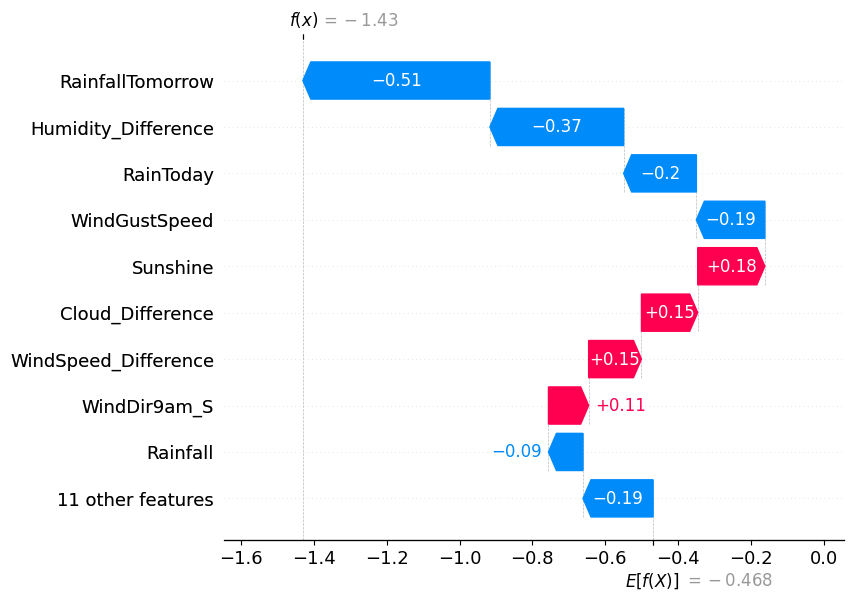

In [242]:
shap.plots.waterfall(explanation)

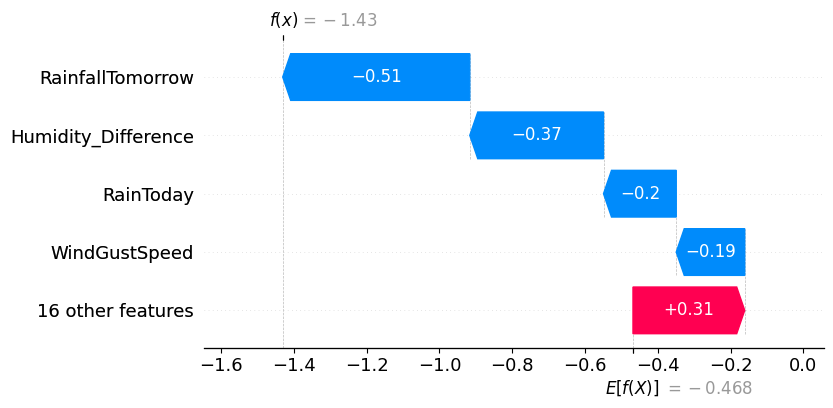

In [243]:
shap.plots.waterfall(explanation, max_display=5)

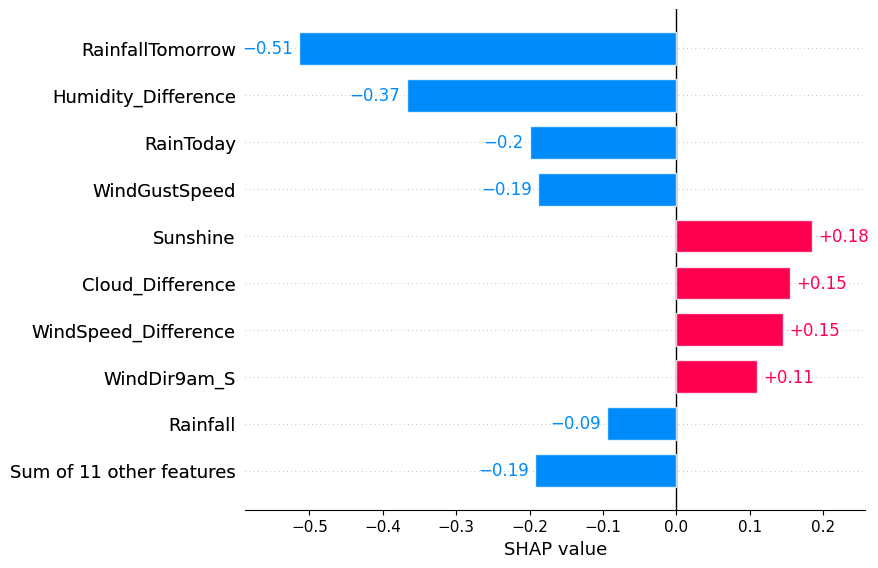

In [244]:
shap.plots.bar(explanation)

##### Interpretabilidad Global

In [245]:
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, feature_names=feature_names, data=x_test_lg)

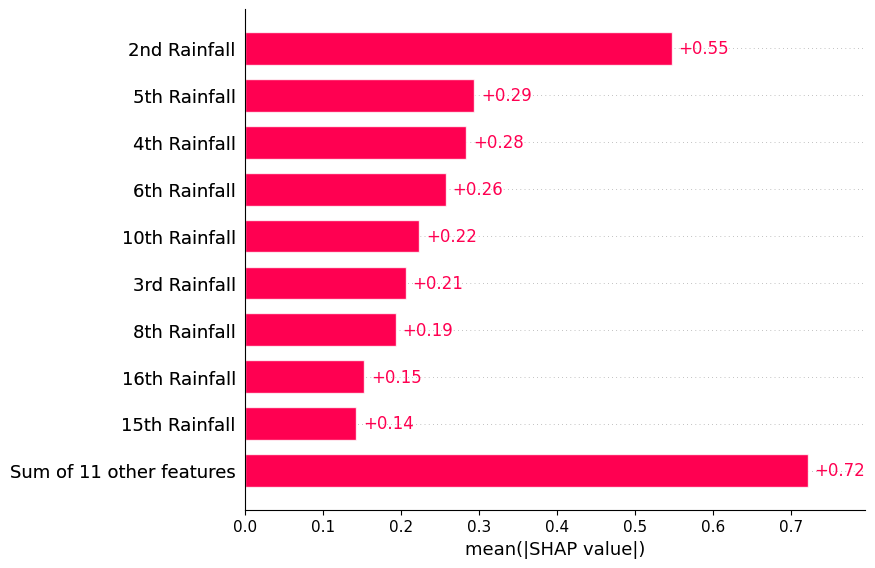

In [246]:
shap.plots.bar(explanation)